In [97]:
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime as dt

import folium
import branca
import bar_chart_race as bcr

---
# Thu th·∫≠p d·ªØ li·ªáu

- D·ªØ li·ªáu ƒë∆∞·ª£c l·∫•y t·∫°i trang web c·ªßa WHO, v·ªÅ ch·ªß ƒë·ªÅ COVID-19 v√† vaccin li√™n quan tr√™n to√†n th·∫ø gi·ªõi. Link chi ti·∫øt [t·∫°i ƒë√¢y](https://covid19.who.int/info/)
- V·ªÅ v·∫•n ƒë·ªÅ c·∫•p ph√©p th√¨ d·ªØ li·ªáu n·∫£y ƒë∆∞·ª£c WHO c·∫•p ph√©p cho c√°c ho·∫°t ƒë·ªông v√¨ l·ª£i √≠ch c·ªông ƒë·ªìng. Nguy√™n vƒÉn nh∆∞ sau:
    >WHO supports open access to the published output of its activities as a fundamental part of its mission and a public benefit to be encouraged wherever possible. Permission from WHO is not required for the use of the WHO coronavirus disease (COVID-19) dashboard material or data available for download
- WHO c√≥ ngu·ªìn d·ªØ li·ªáu n√†y ƒë∆∞·ª£c cung c·∫•p b·ªüi c√°c ph∆∞∆°ng ti·ªán truy·ªÅn th√¥ng ch√≠nh th·ªëng trong th·ªùi gian t·ª´ ng√†y 31/12/2019 - 21/3/2020. T·ª´ ng√†y 22/3/2020 d·ªØ li·ªáu ƒë∆∞·ª£c t·ªïng h·ª£p b·∫±ng b√°o c√°o h·∫±ng ng√†y c·ªßa WHO
    >From the 31 December 2019 to the 21 March 2020, WHO collected the numbers of confirmed COVID-19 cases and deaths through official communications under the International Health Regulations (IHR, 2005), ..., Since 22 March 2020, global data are compiled through WHO region-specific dashboards (see links below), and/or aggregate count data reported to WHO headquarters daily. 

    Note: D·ªØ li·ªáu t·ª´ ng√†y T7, CN ƒë∆∞·ª£c t√≠nh v√†o d·ªØ li·ªáu c·ªßa ng√†y T2. V·ªõi c√°c qu·ªëc gia Trung ƒê√¥ng, d·ªØ li·ªáu ·ªü ng√†y T6 kh√¥ng ƒë∆∞·ª£c c·∫≠p nh·∫≠t.
    
    >Starting 19 June 2021, daily counts of COVID-19 confirmed cases and deaths reported to WHO headquarters on Saturdays and Sundays will be updated on this dashboard on the following Monday. Furthermore, data from the Eastern Mediterranean Region are no long update on Fridays.

Th√¥ng tin c√°c file m√† b·ªçn em s·ª≠ d·ª•ng, ƒë∆∞·ª£c WHO m√¥ t·∫£ nh∆∞ sau:
1. `WHO-COVID-19-global-data.csv` : th·ªëng k√™ s·ªë li·ªáu m·ªói ng√†y c·ªßa c√°c qu·ªëc gia.
2. `WHO-COVID-19-global-table-data.csv`: th·ªëng k·∫ø s·ªë li·ªáu th·ªùi gian g·∫ßn ƒë√¢y c·ªßa c√°c qu·ªëc gia.
3. `vaccination-data.csv`: d·ªØ li·ªáu t√¨nh h√¨nh ti√™m ch·ªßng t·∫°i c√°c qu·ªëc gia.
4. `vaccination-metadat.csv`: d·ªØ li·ªáu vaccin tr√™n to√†n th·∫ø gi·ªõi.

D·ªØ li·ªáu ƒë∆∞·ª£c thu th·∫≠p t·ª´ ng√†y 03/01/2020 ƒë·∫øn 02/12/2021 c·ªßa 237 qu·ªëc qua tr√™n th·∫ø gi·ªõi.

---
# Kh√°m ph√° d·ªØ li·ªáu

·ªû b∆∞·ªõc n√†y nh√≥m em s·∫Ω kh√°m ph√° d·ªØ li·ªáu ·ªü 4 t·∫≠p tin ·ªü tr√™n. ƒê∆Ø·ª£c chia th√†nh 4 ph·∫ßn ri√™ng ƒë√≥ l√† ph·∫ßn t√¨nh h√¨nh COVID-19 v√† 
t√¨nh h√¨nh Vaccin ·ªü c√°c qu·ªëc gia. 

**Note**: Trong qu√° tr√¨nh kh√°m ph√° s·∫Ω c√≥ nh·ªØng ph·∫ßn ti·ªÅn x·ª≠ l√≠ ƒë∆°n gi·∫£n.

<hr style="border:1px solid blue"> </hr>

## Kh√°m ph√° d·ªØ li·ªáu t√¨nh h√¨nh COVID-19 c√°c qu·ªëc gia

### ƒê·ªçc d·ªØ li·ªáu t·ª´ file

- ƒê·ªçc d·ªØ li·ªáu t·ª´ file `WHO-COVID-19-global-table-data.csv` r·ªìi l∆∞u v√†o dataframe `global_table_df`.
- ƒê·ªÉ Index l√† c·ªôt `Name`, ri√™ng index `Global` ƒë·∫°i di·ªán cho to√†n c·∫ßu.

In [98]:
global_table_df = pd.read_csv('dataset/WHO-COVID-19-global-table-data.csv',index_col= False)
global_table_df = global_table_df.set_index('Name')
global_table_df.head()

WHO Region  Cases - cumulative total  \
Name                                                                  
Global                                NaN                 263563622   
United States of America         Americas                  48413265   
India                     South-East Asia                  34615757   
Brazil                           Americas                  22105872   
The United Kingdom                 Europe                  10329078   

                          Cases - cumulative total per 100000 population  \
Name                                                                       
Global                                                       3381.387611   
United States of America                                    14626.247000   
India                                                        2508.380000   
Brazil                                                      10399.855000   
The United Kingdom                                          15215.328000   

                          Cases - newly reported in last 7 days  \
Name                                                              
Global                                                  3973600   
United States of America                                 605870   
India                                                     60326   
Brazil                                                    62760   
The United Kingdom                                       307577   

                          Cases - newly reported in last 7 days per 100000 population  \
Name                                                                                    
Global                                                             50.979273            
United States of America                                          183.041000            
India                                                               4.371000            
Brazil                                                             29.526000            
The United Kingdom                                                453.079000            

                          Cases - newly reported in last 24 hours  \
Name                                                                
Global                                                     653682   
United States of America                                   131187   
India                                                        9216   
Brazil                                                      11413   
The United Kingdom                                          53067   

                          Deaths - cumulative total  \
Name                                                  
Global                                      5232562   
United States of America                     778336   
India                                        470115   
Brazil                                       614964   
The United Kingdom                           145281   

                          Deaths - cumulative total per 100000 population  \
Name                                                                        
Global                                                          67.131117   
United States of America                                       235.145000   
India                                                           34.066000   
Brazil                                                         289.314000   
The United Kingdom                                             214.007000   

                          Deaths - newly reported in last 7 days  \
Name                                                               
Global                                                     47864   
United States of America                                    6388   
India                                                       2647   
Brazil                                                      1625   
The United Kingdom                                           848   

                   

### D·ªØ li·ªáu c√≥ bao nhi√™u d√≤ng, c·ªôt

T√≠nh s·ªë d√≤ng v√† s·ªë c·ªôt c·ªßa dataframe `global_table_df` r·ªìi l∆∞u v√†o `num_rows_global_table` v√† `num_cols_global_table`

In [99]:
num_rows_global_table , num_cols_global_table = global_table_df.shape
print(f'D·ªØ li·ªáu c√≥ {num_rows_global_table} d√≤ng.')
print(f'D·ªØ li·ªáu c√≥ {num_cols_global_table} c·ªôt.')

D·ªØ li·ªáu c√≥ 238 d√≤ng.
D·ªØ li·ªáu c√≥ 11 c·ªôt.


Ch√∫ng ta kh√¥ng x√©t t·ªõi d√≤ng index `Global` n√™n d·ªØ li·ªáu g·ªìm 237 `qu·ªëc gia`, ƒë√∫ng v·ªõi m√¥ t·∫£ ·ªü tr√™n.

### M·ªói d√≤ng c√≥ √Ω nghƒ©a g√¨ ? C√≥ v·∫•n ƒë·ªÅ v·ªÅ √Ω nghƒ©a gi·ªØa c√°c d√≤ng kh√°c nhau hay kh√¥ng ?

Theo quan s√°t s∆° b·ªô v√† file m√¥ t·∫£ d·ªØ li·ªáu tr√™n website ch√≠nh c·ªßa WHO th√¨ d·ªØ li·ªáu cho bi·∫øt th√¥ng tin v·ªÅ t√≠nh h√¨nh COVID-19 c·ªßa t·ª´ng qu·ªëc gia.\
C√≥ v·∫ª kh√¥ng c√≥ v·∫•n ƒë·ªÅ v·ªÅ √Ω nghƒ©a t·ª´ng d√≤ng.

### D·ªØ li·ªáu c√≥ b·ªã l·∫∑p kh√¥ng ?

T√≠nh s·ªë d√≤ng d·ªØ li·ªáu b·ªã tr√πng (n·∫øu c√≥) r·ªìi l∆∞u v√†o bi·∫øn `num_rows_dupicated`.

In [100]:
num_rows_duplicated = num_rows_global_table - len(global_table_df.index.drop_duplicates())
print(num_rows_duplicated)

0


### M·ªói c·ªôt c√≥ √Ω nghƒ©a g√¨ ?

D·ª±a v√†o m√¥ t·∫£ ch√≠nh th·ª©c tr√™n website WHO, em ƒë√£ m√¥ t·∫£ √Ω nghƒ©a t·ª´ng c·ªôt d·ªØ li·ªáu trong file `description_global_table.csv`

In [101]:
pd.set_option("display.max_colwidth",200)
description_global_table = pd.read_csv('dataset/Description-global-table.csv',
                                       delimiter= '\t',index_col='Field name')

In [102]:
description_global_table

Type  \
Field name                                                              
Name                                                           String   
WHO_region                                                     String   
Cases - cumulative total                                      Integer   
Cases - cumulative total per 100000 population                Decimal   
Cases - newly reported in last 7 days                         Integer   
Cases - newly reported in last 7 days per 100000 population   Decimal   
Cases - newly reported in last 24 hours                       Integer   
Deaths - cumulative total                                     Integer   
Deaths - cumulative total per 100000 population               Decimal   
Deaths - newly reported in last 7 days                        Integer   
Deaths - newly reported in last 7 days per 100000 population  Decimal   
Deaths - newly reported in last 24 hours                      Integer   

                                                                                                                                                                                                                   Description  
Field name                                                                                                                                                                                                                      
Name                                                                                                                                                                                                  Country, territory, area  
WHO_region                                                                                                                                                                                                          WHO Region  
Cases - cumulative total                                                                                                                                                   Cumulative confirmed cases reported to WHO to date.  
Cases - cumulative total per 100000 population                                                                                                      Cumulative confirmed cases reported to WHO to date per 100,000 population.  
Cases - newly reported in last 7 days                            New confirmed cases reported in the last 7 days. Calculated by subtracting previous cumulative case count (8 days prior) from current cumulative cases count.  
Cases - newly reported in last 7 days per 100000 population                                                                                            New confirmed cases reported in the last 7 days per 100,000 population.  
Cases - newly reported in last 24 hours                                       New confirmed cases reported in the last 24 hours. Calculated by subtracting previous cumulative case count from current cumulative cases count.  
Deaths - cumulative total                                                                                                                                                 Cumulative confirmed deaths reported to WHO to date.  
Deaths - cumulative total per 100000 population                                                                                                    Cumulative confirmed deaths reported to WHO to date per 100,000 population.  
Deaths - newly reported in last 7 days                        New confirmed deaths reported in the last 7 days. Calculated by subtracting previous cumulative death count (8 days prior) from current cumulative deaths count.  
Deaths - newly reported in last 7 days per 100000 population                                                                                          New confirmed deaths reported in the last 7 days per 100,000 population.  
Deaths - newly reported in last 24 hours                                   New confirmed deaths reported in the last 

### M·ªói c·ªôt hi·ªán t·∫°i ƒëang c√≥ d·ªØ li·ªáu g√¨ ? C√≥ c·ªôt n√†o c√≥ ki·ªÉu d·ªØ li·ªáu kh√¥ng ph√π h·ª£p kh√¥ng ?

In [103]:
global_table_df.dtypes

WHO Region                                                       object
Cases - cumulative total                                          int64
Cases - cumulative total per 100000 population                  float64
Cases - newly reported in last 7 days                             int64
Cases - newly reported in last 7 days per 100000 population     float64
Cases - newly reported in last 24 hours                           int64
Deaths - cumulative total                                         int64
Deaths - cumulative total per 100000 population                 float64
Deaths - newly reported in last 7 days                            int64
Deaths - newly reported in last 7 days per 100000 population    float64
Deaths - newly reported in last 24 hours                          int64
dtype: object

V·∫≠y **Kh√¥ng c√≥ g√¨ b·∫•t th∆∞·ªùng**

### Ph√¢n b·ªë d·ªØ li·ªáu d·∫°ng numerical

D·ªØ li·ªáu ·ªü ƒë√¢y ph·∫ßn l·ªõn ·ªü d·∫°ng `numerical`, tr·ª´ `WHO Region`. \
`WHO Region` ki·ªÉu d·ªØ li·ªáu `int64` nh∆∞ng ƒë√¢y l√† m√£ v√πng n√™n kh√¥ng c√≥ nhi·ªÅu √Ω nghƒ©a n·∫øu x·∫øp v√†o `numerical`

In [104]:
def missing_ration(column):
    return (column.isna().mean() * 100).round(1)

def lower_quantile(column):
    return column.quantile(q= 0.25)

def upper_quantile(column):
    return column.quantile(q= 0.75)

---
### Quay l·∫°i kh√°m ph√° d·ªØ li·ªáu

- ·ªû ƒë√¢y ch·ªâ c√≥ c·ªôt `WHO Region` kh√¥ng thu·ªôc ki·ªÉu `numerical`.
- D√≤ng `Global` c≈©ng s·∫Ω ƒë∆∞·ª£c kh√¥ng x√©t v√¨ ta ch·ªâ ƒë√°nh gi√° s·ª± t∆∞∆°ng quan gi·ªØa c√°c qu·ªëc gia v·ªõi nhau.

In [105]:
numerical_df = global_table_df.drop(columns = ['WHO Region'],index='Global')
numerical_df.aggregate([missing_ration,pd.Series.min,lower_quantile,
                        pd.Series.median,upper_quantile,pd.Series.max])

Cases - cumulative total  \
missing_ration                       0.0   
min                                  0.0   
lower_quantile                   10006.0   
median                           76496.0   
upper_quantile                  549810.0   
max                           48413265.0   

                Cases - cumulative total per 100000 population  \
missing_ration                                         0.40000   
min                                                    0.00000   
lower_quantile                                       466.51725   
median                                              4791.30250   
upper_quantile                                      9579.38850   
max                                                25135.73500   

                Cases - newly reported in last 7 days  \
missing_ration                                    0.0   
min                                               0.0   
lower_quantile                                   50.0   
median                                          458.0   
upper_quantile                                 4485.0   
max                                          605870.0   

                Cases - newly reported in last 7 days per 100000 population  \
missing_ration                                                      0.40000   
min                                                                 0.00000   
lower_quantile                                                      0.76775   
median                                                             19.15300   
upper_quantile                                                    136.46925   
max                                                              1413.31800   

                Cases - newly reported in last 24 hours  \
missing_ration                                      0.0   
min                                                 0.0   
lower_quantile                                      0.0   
median                                             32.0   
upper_quantile                                    538.0   
max                                            131187.0   

                Deaths - cumulative total  \
missing_ration                        0.0   
min                                   0.0   
lower_quantile                      122.0   
median                             1327.0   
upper_quantile                     8839.0   
max                              778336.0   

                Deaths - cumulative total per 100000 population  \
missing_ration                                           0.4000   
min                                                      0.0000   
lower_quantile                                           7.0330   
median                                                  52.6165   
upper_quantile                                         145.7290   
max                                                    610.2450   

                Deaths - newly reported in last 7 days  \
missing_ration                                     0.0   
min                                                0.0   
lower_quantile                                     0.0   
median                                             4.0   
upper_quantile                                    70.0   
max                                             8565.0   

                Deaths - newly reported in last 7 days per 100000 population  \
missing_ration                                                        0.4000   
min                                                                   0.0000   
lower_quantile                                                        0.0000   
median                                                                0.0935   
upper_quantile                                                        0.9045   
max                                                                  12.8560   

                Deaths - newly reported in last 24 hours  
missing_ration                                       0.0  
min 

V·∫≠y **kh√¥ng c√≥ g√¨ b·∫•t th∆∞·ªùng**

### Ph√¢n b·ªë d·ªØ li·ªáu d·∫°ng categorical

In [106]:
pd.set_option("display.max_colwidth",100)
global_table_df[['WHO Region']].agg([missing_ration,pd.Series.unique,pd.Series.nunique])

WHO Region
missing_ration                                                                                              0.4
unique          [nan, Americas, South-East Asia, Europe, Eastern Mediterranean, Africa, Western Pacific, Other]
nunique                                                                                                       7

V·∫≠y **kh√¥ng c√≥ g√¨ b·∫•t th∆∞·ªùng**

V·∫Ω `barh chart` ƒë·ªÉ xem ph√¢n b·ªë c√°c gi√° tr·ªã c·ªßa c·ªôt `WHO region`

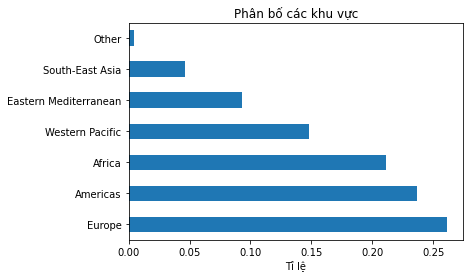

In [107]:
global_table_df['WHO Region'].value_counts(normalize = True).plot.barh()
plt.xlabel('T·ªâ l·ªá')
plt.title('Ph√¢n b·ªë c√°c khu v·ª±c');

<hr style="border:1px solid blue"> </hr>

## Kh√°m ph√° d·ªØ li·ªáu t√¨nh h√¨nh COVID-19 theo ng√†y

### ƒê·ªçc d·ªØ li·ªáu t·ª´ file

- ƒê·ªçc d·ªØ li·ªáu t·ª´ file `WHO-COVID-19-global-data.csv` r·ªìi l∆∞u v√†o dataframe `global_df`.
- M·ªói qu·ªëc gia ƒë∆∞·ª£c th·ªëng k√™ trong nhi·ªÅu ng√†y, ta n√™n ƒë·ªÉ index l√† `s·ªë d√≤ng`

In [108]:
global_df = pd.read_csv('dataset/WHO-COVID-19-global-data.csv')
global_df.tail()

Date_reported Country_code   Country WHO_region  New_cases  \
166132    2021-11-29           ZW  Zimbabwe       AFRO         40   
166133    2021-11-30           ZW  Zimbabwe       AFRO        235   
166134    2021-12-01           ZW  Zimbabwe       AFRO        426   
166135    2021-12-02           ZW  Zimbabwe       AFRO        685   
166136    2021-12-03           ZW  Zimbabwe       AFRO       1042   

        Cumulative_cases  New_deaths  Cumulative_deaths  
166132            133991           0               4705  
166133            134226           1               4706  
166134            134652           1               4707  
166135            135337           0               4707  
166136            136379           0               4707

### D·ªØ li·ªáu c√≥ bao nhi√™u d√≤ng v√† c·ªôt ?

T√≠nh s·ªë d√≤ng v√† s·ªë c·ªôt r·ªìi l∆∞u v√†o bi·∫øn `num_rows_global` v√† `num_cols_global`

In [109]:
num_rows_global , num_cols_global = global_df.shape
print(f'D·ªØ li·ªáu c√≥ {num_rows_global} d√≤ng')
print(f'D·ªØ li·ªáu c√≥ {num_cols_global} c·ªôt')

D·ªØ li·ªáu c√≥ 166137 d√≤ng
D·ªØ li·ªáu c√≥ 8 c·ªôt


### M·ªói d√≤ng d·ªØ li·ªáu c√≥ √Ω nghƒ©a g√¨ ? C√≥ v·∫•n ƒë·ªÅ c√°c d√≤ng c√≥ √Ω nghƒ©a kh√°c nhau kh√¥ng ?

Theo quan s√°t s∆° b·ªô v√† file m√¥ t·∫£ d·ªØ li·ªáu tr√™n website ch√≠nh c·ªßa WHO th√¨ d·ªØ li·ªáu cho bi·∫øt th√¥ng tin v·ªÅ t√≠nh h√¨nh COVID-19 h·∫±ng ng√†y c·ªßa t·ª´ng qu·ªëc gia. \
C√≥ v·∫ª kh√¥ng c√≥ v·∫•n ƒë·ªÅ v·ªÅ √Ω nghƒ©a t·ª´ng d√≤ng.

### D·ªØ li·ªáu c√≥ b·ªã l·∫∑p kh√¥ng

T√≠nh s·ªë d√≤ng d·ªØ li·ªáu b·ªã tr√πng (n·∫øu c√≥) r·ªìi l∆∞u v√†o bi·∫øn `num_rows_dupicated`.

In [110]:
num_rows_duplicated = num_rows_global - len(global_df.drop_duplicates())
print(num_rows_duplicated)

0


### M·ªói c·ªôt c√≥ √Ω nghƒ©a g√¨ ?

D·ª±a v√†o m√¥ t·∫£ ch√≠nh th·ª©c tr√™n website WHO, em ƒë√£ m√¥ t·∫£ √Ω nghƒ©a t·ª´ng c·ªôt d·ªØ li·ªáu trong file `description_global.csv`

In [111]:
pd.set_option("display.max_colwidth",500)
description_global = pd.read_csv('dataset/Description-global.csv',
                                 delimiter= '\t',index_col= 'Field name')

In [112]:
description_global

Type  \
Field name                   
Date_reported         Date   
Country_code        String   
Country             String   
WHO_region          String   
New_cases          Integer   
Cumulative_cases   Integer   
New_deaths         Integer   
Cumulative_deaths  Integer   

                                                                                                                                                                                                                                                                                                                                                         Description  
Field name                                                                                                                                                                                                                                                                                                                                                            
Date_reported                                                                                                                                                                                                                                                                                                                               Date of reporting to WHO  
Country_code                                                                                                                                                                                                                                                                                                                                ISO Alpha-2 country code  
Country                                                                                                                                                                                                                                                                                                                                     Country, territory, area  
WHO_region         WHO regional offices: WHO Member States are grouped into six WHO regions -- Regional Office for Africa (AFRO), Regional Office for the Americas (AMRO), Regional Office for South-East Asia (SEARO), Regional Office for Europe (EURO), Regional Office for the Eastern Mediterranean (EMRO), and Regional Office for the Western Pacific (WPRO).  
New_cases                                                                                                                                                                                                                                        New confirmed cases. Calculated by subtracting previous cumulative case count from current cumulative cases count.*  
Cumulative_cases                                                                                                                                                                                                                                                                                                 Cumulative confirmed cases reported to WHO to date.  
New_deaths                                                                                                                                                                                                                                               New confirmed deaths. Calculated by subtracting previous cumulative deaths from current cumulative deaths.*  
Cumulative_deaths                                                                                                                                                                                                                                                                                               Cumulative confirmed deaths reported to WHO to date.

### M·ªói c·ªôt hi·ªán t·∫°i ƒëang c√≥ d·ªØ li·ªáu g√¨ ?

In [113]:
global_df.dtypes

Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

`Date_reported` n√™n c√≥ ki·ªÉu d·ªØ li·ªáu `datetime`

---
### Ti·ªÅn x·ª≠ l√Ω: Thay ƒë·ªïi ki·ªÉu d·ªØ li·ªáu

In [114]:
global_df['Date_reported'] = pd.to_datetime(global_df['Date_reported'])

V·∫≠y **Ki·ªÉu d·ªØ li·ªáu kh√¥ng c√≥ g√¨ b·∫•t th∆∞·ªùng**

---
### Quay l·∫°i kh√°m ph√° d·ªØ li·ªáu: Ph√¢n b·ªë ki·ªÉu d·ªØ li·ªáu numerical

In [115]:
numerical_df = global_df.select_dtypes(['int64','float64','datetime64'])
numerical_df.agg([missing_ration,pd.Series.min,lower_quantile,
                  pd.Series.median,upper_quantile,pd.Series.max])

Date_reported  New_cases  Cumulative_cases  New_deaths  \
missing_ration                  0.0        0.0               0.0         0.0   
min             2020-01-03 00:00:00   -32952.0               0.0     -2371.0   
lower_quantile  2020-06-26 00:00:00        0.0              69.0         0.0   
median          2020-12-18 00:00:00       16.0            5906.0         0.0   
upper_quantile  2021-06-11 00:00:00      402.0          102499.0         6.0   
max             2021-12-03 00:00:00   414188.0        48413265.0      8786.0   

                Cumulative_deaths  
missing_ration                0.0  
min                           0.0  
lower_quantile                0.0  
median                       91.0  
upper_quantile             1761.0  
max                      778336.0

- new_cases < 0 v√† new_death < 0 ???
    - new_cases = t·ªïng s·ªë ca t√≠ch lu·ªπ t·ªõi h√¥m nay - t·ªïng s·ªë ca t√≠ch lu·ªπ t·ª´ h√¥m tr∆∞·ªõc
    - new_death = t·ªïng s·ªë ca t√≠ch lu·ªπ t·ªõi h√¥m nay - t·ªïng s·ªë ca t√≠ch lu·ªπ t·ª´ h√¥m tr∆∞·ªõc.

Theo em th√¨ do th√¥ng tin ng√†y h√¥m tr∆∞·ªõc ch∆∞a ch√≠nh x√°c n√™n s·∫Ω ƒë∆∞·ª£c t√≠nh v√† tr·ª´ cho ng√†y h√¥m sau.\
V·∫≠y kh√¥ng c√≥ g√¨ b·∫•t th∆∞·ªùng

### Ph√¢n b·ªë ki·ªÉu d·ªØ li·ªáu categorical

In [116]:
pd.set_option("display.max_colwidth",51)
categorical_df = global_df.select_dtypes(['object'])
categorical_df.agg([missing_ration,pd.Series.unique,pd.Series.nunique])

Country_code  \
missing_ration                                                 0.4   
unique          [AF, AL, DZ, AS, AD, AO, AI, AG, AR, AM, AW, AU...   
nunique                                                        236   

                                                           Country  \
missing_ration                                                 0.0   
unique          [Afghanistan, Albania, Algeria, American Samoa,...   
nunique                                                        237   

                                                  WHO_region  
missing_ration                                           0.0  
unique          [EMRO, EURO, AFRO, WPRO, AMRO, SEARO, Other]  
nunique                                                    7

V·∫Ω `barh chart` cho `WHO Region`

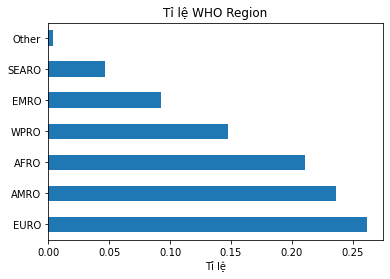

In [117]:
global_df['WHO_region'].value_counts(normalize=True).plot.barh()
plt.xlabel('T·ªâ l·ªá')
plt.title('T·ªâ l·ªá WHO Region');

`Bar chart` n√†y c√≥ t·ªâ l·ªá kh√° t∆∞∆°ng quan v·ªõi `Bar chart` m√† ta ƒë√£ kh√°m ph√° ·ªü ph·∫ßn tr∆∞·ªõc ƒë√≥. 

### D·ªØ li·ªáu c√≥ d√≤ng n√†o d∆∞ th·ª´a hay kh√¥ng?

C√°c qu·ªëc gia kh√°c nhau s·∫Ω c√≥ th·ªùi ƒëi·ªÉm xu·∫•t hi·ªán ca nhi·ªÖm ƒë·∫ßu ti√™n kh√°c nhau, v·∫≠y tr∆∞·ªõc th·ªùi ƒëi·ªÉm n√†y th√¨ d·ªØ li·ªáu s·∫Ω to√†n `0`(s·ªë ca nhi·ªÖm, ca t·ª≠ vong,...) kh√¥ng gi√∫p √≠ch cho vi·ªác hi·ªÉu d·ªØ li·ªáu. V·∫≠y n√™n ta ch·ªâ x√©t d·ªØ li·ªáu t·ª´ th·ªùi ƒëi·ªÉm xu·∫•t hi·ªán ca nhi·ªÖm ƒë·∫ßu ti√™n t·ªõi th·ªùi ƒëi·ªÉm cu·ªëi c√πng thu th·∫≠p ƒë∆∞·ª£c.
- Thay th·∫ø nh·ªØng gi√° tr·ªã b·∫±ng 0 th√†nh NaN (d√π sai v·ªõi √Ω nghƒ©a nh∆∞ng ta s·∫Ω lo·∫°i b·ªè nh·ªØng d√≤ng n√†y n√™n kh√¥ng sao.)
- Xo√° nh·ªØng d√≤ng ch·ª©a to√†n NaN.

### Ti·ªÅn x·ª≠ l√Ω : Gi·∫£m s·ªë l∆∞·ª£ng d√≤ng

In [118]:
global_df = global_df.replace(0,np.nan)
global_df = global_df.dropna(how = 'all',subset = ['New_cases','Cumulative_cases',
                                   'New_deaths','Cumulative_deaths'])
global_df = global_df.reset_index().drop(columns='index')

Ch√∫ng ta ƒë√£ gi·∫£m ƒë∆∞·ª£c m·ªôt s·ªë l∆∞·ª£ng l·ªõn nh·ªØng d√≤ng d·ªØ li·ªáu v√¥ nghƒ©a :))

### Ti·ªÅn x·ª≠ l√Ω : Th√™m c·ªôt Month v√†o Dataframe

ƒê√¥i khi ta s·∫Ω ph·∫£i th·ªëng k√™ s·ªë li·ªáu theo t·ª´ng th√°ng ƒë·ªÉ th·∫•y r√µ ƒë∆∞a ra nh·∫≠n x√©t. Do ƒë√≥ tr∆∞·ªõc khi tr·∫£ l·ªùi c√¢u h·ªèi, ta s·∫Ω th√™m c·ªôt `Month` v√†o DataFrame.

In [119]:
Month = global_df['Date_reported'].dt.month
global_df['Month'] = Month

<hr style="border:1px solid blue"> </hr>

## Kh√°m ph√° d·ªØ li·ªáu t√¨nh tr·∫°ng ti√™m ch·ªßng COVID-19 ·ªü c√°c qu·ªëc gia

### ƒê·ªçc d·ªØ li·ªáu t·ª´ file

ƒê·ªçc d·ªØ li·ªáu t·ª´ file `vaccination-data.csv` r·ªìi l∆∞u v√†o dataframe `vaccin_df`.

In [120]:
vaccin_df = pd.read_csv('dataset/vaccination-data.csv')
vaccin_df.sample(5)

COUNTRY ISO3 WHO_REGION DATA_SOURCE DATE_UPDATED  \
105              Jordan  JOR       EMRO   REPORTING   2021-12-01   
91             Honduras  HND       AMRO   REPORTING   2021-12-03   
23               Bhutan  BTN      SEARO   REPORTING   2021-11-28   
95            Indonesia  IDN      SEARO   REPORTING   2021-11-30   
170  Russian Federation  RUS       EURO        OWID   2021-12-01   

     TOTAL_VACCINATIONS  PERSONS_VACCINATED_1PLUS_DOSE  \
105             8008442                      4144133.0   
91              9030824                      4927085.0   
23              1153555                       589215.0   
95            234857452                    139374391.0   
170           125594890                     66201198.0   

     TOTAL_VACCINATIONS_PER100  PERSONS_VACCINATED_1PLUS_DOSE_PER100  \
105                     78.490                                40.616   
91                      91.178                                49.745   
23                     149.500                                76.362   
95                      85.864                                50.955   
170                     86.100                                45.364   

     PERSONS_FULLY_VACCINATED  PERSONS_FULLY_VACCINATED_PER100  \
105                 3755768.0                           36.810   
91                  3891577.0                           39.291   
23                   564340.0                           73.138   
95                 95483061.0                           34.909   
170                56114718.0                           38.452   

                                          VACCINES_USED FIRST_VACCINE_DATE  \
105  AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-Co...         2021-01-13   
91   AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-Va...         2021-02-26   
23   AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-Co...         2021-03-27   
95   AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-Co...         2021-01-13   
170          SRCVB - EpiVacCorona, Gamaleya - Sputnik V                NaN   

     NUMBER_VACCINES_TYPES_USED  
105                         6.0  
91                          6.0  
23                          5.0  
95                          6.0  
170                         2.0

### D·ªØ li·ªáu c√≥ bao nhi√™u d√≤ng v√† c·ªôt ?

T√≠nh s·ªë d√≤ng v√† s·ªë c·ªôt r·ªìi l∆∞u v√†o bi·∫øn `num_rows_vaccin` v√† `num_cols_vaccin`

In [121]:
num_rows_vaccin , num_cols_vaccin = vaccin_df.shape
print(f'D·ªØ li·ªáu c√≥ {num_rows_vaccin} d√≤ng')
print(f'D·ªØ li·ªáu c√≥ {num_cols_vaccin} c·ªôt')

D·ªØ li·ªáu c√≥ 228 d√≤ng
D·ªØ li·ªáu c√≥ 14 c·ªôt


### M·ªói d√≤ng d·ªØ li·ªáu c√≥ √Ω nghƒ©a g√¨ ? C√≥ v·∫•n ƒë·ªÅ c√°c d√≤ng c√≥ √Ω nghƒ©a kh√°c nhau kh√¥ng ?

Theo quan s√°t s∆° b·ªô v√† file m√¥ t·∫£ d·ªØ li·ªáu tr√™n website ch√≠nh c·ªßa WHO th√¨ d·ªØ li·ªáu cho bi·∫øt th√¥ng tin v·ªÅ t√≠nh h√¨nh ti√™m ch·ªßng c·ªßa t·ª´ng qu·ªëc gia v·ªõi ng√†y c·∫≠p nh·∫≠t g·∫ßn nh·∫•t.

### D·ªØ li·ªáu c√≥ b·ªã l·∫∑p kh√¥ng

T√≠nh s·ªë d√≤ng d·ªØ li·ªáu b·ªã tr√πng (n·∫øu c√≥) r·ªìi l∆∞u v√†o bi·∫øn `num_rows_dupicated`.

In [122]:
num_rows_duplicated = num_rows_vaccin - len(vaccin_df.drop_duplicates())
print(num_rows_duplicated)

0


### M·ªói c·ªôt c√≥ √Ω nghƒ©a g√¨ ?

D·ª±a v√†o m√¥ t·∫£ ch√≠nh th·ª©c tr√™n website WHO, √Ω nghƒ©a t·ª´ng c·ªôt ƒë∆∞·ª£c m√¥ t·∫£ trong file `Description_data.csv`

In [123]:
pd.set_option("display.max_colwidth",500)
description_data = pd.read_csv('dataset/Description_data.csv',
                                 delimiter= '\t',index_col= 'Field name')

In [124]:
description_data

Type  \
Field name                                      
COUNTRY                                String   
ISO3                                   String   
WHO_REGION                             String   
DATA_SOURCE                            String   
DATE_UPDATED                             Date   
TOTAL_VACCINATIONS                    Integer   
PERSONS_VACCINATED_1PLUS_DOSE         Decimal   
TOTAL_VACCINATIONS_PER100             Integer   
PERSONS_VACCINATED_1PLUS_DOSE_PER100  Decimal   
PERSONS_FULLY_VACCINATED              Integer   
PERSONS_FULLY_VACCINATED_PER100       Decimal   
VACCINES_USED                          String   
FIRST_VACCINE_DATE                       Date   
NUMBER_VACCINES_TYPES_USED            Integer   

                                                                                                                                                                                                                                                                                                                                                                           Description  
Field name                                                                                                                                                                                                                                                                                                                                                                              
COUNTRY                                                                                                                                                                                                                                                                                                                                                       Country, territory, area  
ISO3                                                                                                                                                                                                                                                                                                                                                          ISO Alpha-3 country code  
WHO_REGION                            WHO regional offices: WHO Member States are grouped into six WHO regions:  Regional Office for Africa (AFRO), Regional Office for the Americas (AMRO), Regional Office for South-East Asia (SEARO), Regional Office for Europe (EURO), Regional Office for the Eastern Mediterranean (EMRO), and Regional Office for the Western Pacific (WPRO).  
DATA_SOURCE                                                                                                                                                                            Indicates data source: - REPORTING: Data reported by Member States, or sourced from official reports - OWID: Data sourced from Our World in Data: https://ourworldindata.org/covid-vaccinations  
DATE_UPDATED                                                                                                                                                                                                                                                                                                                                                       Date of last update  
TOTAL_VACCINATIONS                                                                                                                                                                                                                                                                                                                         Cumulative total vaccine doses administered  
PERSONS_VACCINATED_1PLUS_DOSE                                                                                                                                                                                                                   

### M·ªói c·ªôt hi·ªán t·∫°i ƒëang c√≥ d·ªØ li·ªáu g√¨ ?

In [125]:
vaccin_df.dtypes

COUNTRY                                  object
ISO3                                     object
WHO_REGION                               object
DATA_SOURCE                              object
DATE_UPDATED                             object
TOTAL_VACCINATIONS                        int64
PERSONS_VACCINATED_1PLUS_DOSE           float64
TOTAL_VACCINATIONS_PER100               float64
PERSONS_VACCINATED_1PLUS_DOSE_PER100    float64
PERSONS_FULLY_VACCINATED                float64
PERSONS_FULLY_VACCINATED_PER100         float64
VACCINES_USED                            object
FIRST_VACCINE_DATE                       object
NUMBER_VACCINES_TYPES_USED              float64
dtype: object

`DATE_UPDATED`, `FIRST_VACCINE_DATE` n√™n c√≥ ki·ªÉu d·ªØ li·ªáu `datetime`

---
### Ti·ªÅn x·ª≠ l√Ω: Thay ƒë·ªïi ki·ªÉu d·ªØ li·ªáu

In [126]:
vaccin_df = vaccin_df.astype({'DATE_UPDATED': 'datetime64[ns]', 'FIRST_VACCINE_DATE': 'datetime64[ns]'})

In [127]:
assert vaccin_df['DATE_UPDATED'].dtype == np.dtype('datetime64[ns]')
assert vaccin_df['FIRST_VACCINE_DATE'].dtype == np.dtype('datetime64[ns]')

V·∫≠y **Ki·ªÉu d·ªØ li·ªáu kh√¥ng c√≥ g√¨ b·∫•t th∆∞·ªùng**

---
### Quay l·∫°i kh√°m ph√° d·ªØ li·ªáu: Ph√¢n b·ªë ki·ªÉu d·ªØ li·ªáu numerical

In [128]:
numerical_df = vaccin_df.select_dtypes(['int64','float64','datetime64'])
numerical_df.agg([missing_ration,pd.Series.min,lower_quantile,
                  pd.Series.median,upper_quantile,pd.Series.max])

DATE_UPDATED  TOTAL_VACCINATIONS  \
missing_ration                  0.0        0.000000e+00   
min             2021-04-09 00:00:00        7.400000e+01   
lower_quantile  2021-11-25 00:00:00        2.656605e+05   
median          2021-11-28 00:00:00        1.802748e+06   
upper_quantile  2021-12-01 00:00:00        1.154469e+07   
max             2021-12-04 00:00:00        2.483096e+09   

                PERSONS_VACCINATED_1PLUS_DOSE  TOTAL_VACCINATIONS_PER100  \
missing_ration                   2.200000e+00                    0.00000   
min                              3.700000e+01                    0.01300   
lower_quantile                   1.526895e+05                   45.36700   
median                           1.070741e+06                   98.37900   
upper_quantile                   6.329072e+06                  142.65175   
max                              1.240357e+09                  296.07000   

                PERSONS_VACCINATED_1PLUS_DOSE_PER100  \
missing_ration                                2.2000   
min                                           0.0070   
lower_quantile                               26.9515   
median                                       53.4740   
upper_quantile                               71.8095   
max                                         121.6790   

                PERSONS_FULLY_VACCINATED  PERSONS_FULLY_VACCINATED_PER100  \
missing_ration              1.800000e+00                          1.80000   
min                         3.700000e+01                          0.00700   
lower_quantile              1.109355e+05                         21.23675   
median                      8.130390e+05                         44.96050   
upper_quantile              5.107506e+06                         65.75900   
max                         1.089827e+09                        118.20100   

                 FIRST_VACCINE_DATE  NUMBER_VACCINES_TYPES_USED  
missing_ration                  8.8                         1.3  
min             2020-07-22 00:00:00                         1.0  
lower_quantile  2021-01-07 12:00:00                         2.0  
median          2021-02-17 00:00:00                         4.0  
upper_quantile  2021-03-15 00:00:00                         5.0  
max             2021-10-18 00:00:00                        10.0

V·∫≠y c√≥ 5 c·ªôt `PERSONS_VACCINATED_1PLUS_DOSE_PER100 	PERSONS_FULLY_VACCINATED 	PERSONS_FULLY_VACCINATED_PER100 	FIRST_VACCINE_DATE 	NUMBER_VACCINES_TYPES_USED` c√≥ gi√° tr·ªã `NaN`

---
### Ti·ªÅn x·ª≠ l√≠: X·ª≠ l√≠ c√°c th√¥ng tin ch·ª©a `NaN`

Ki·ªÉm tra nh·ªØng qu·ªëc gia n√†o c√≥ `NUMBER_VACCINES_TYPES_USED` l√† `NaN`

In [129]:
vaccin_df[vaccin_df['NUMBER_VACCINES_TYPES_USED'].isna()]

COUNTRY ISO3 WHO_REGION DATA_SOURCE DATE_UPDATED  \
25          Bonaire  XAA       AMRO   REPORTING   2021-12-03   
172            Saba  XCA       AMRO   REPORTING   2021-12-03   
186  Sint Eustatius  XBA       AMRO   REPORTING   2021-12-03   

     TOTAL_VACCINATIONS  PERSONS_VACCINATED_1PLUS_DOSE  \
25                32084                        16995.0   
172                3131                            NaN   
186                2963                         1509.0   

     TOTAL_VACCINATIONS_PER100  PERSONS_VACCINATED_1PLUS_DOSE_PER100  \
25                     153.402                                81.257   
172                    161.976                                   NaN   
186                     94.393                                48.073   

     PERSONS_FULLY_VACCINATED  PERSONS_FULLY_VACCINATED_PER100 VACCINES_USED  \
25                    15089.0                           72.144           NaN   
172                    1557.0                           80.548           NaN   
186                    1454.0                           46.320           NaN   

    FIRST_VACCINE_DATE  NUMBER_VACCINES_TYPES_USED  
25                 NaT                         NaN  
172                NaT                         NaN  
186                NaT                         NaN

Nh∆∞ ·ªü tr√™n ta th·∫•y, nh·ªØng qu·ªëc gia n√†y c√°c th√¥ng tin v·ªÅ c√°c th√¥ng tin v·ªÅ lo·∫°i vaccin ƒë·ªÅu `NaN`, do ƒë√≥ c√≥ th·ªÉ th√¥ng tin s·∫Ω g√¢y sai l·ªách khi t√≠nh to√°n chung, N√™n nh√≥m em quy·∫øt ƒë·ªãnh lo·∫°i b·ªè c√°c d√≤ng n√†y.

In [130]:
vaccin_df = vaccin_df[~vaccin_df['NUMBER_VACCINES_TYPES_USED'].isna()]

Ki·ªÉm tra l·∫°i ph√¢n b·ªï c√°c bi·∫øn numerical. Ta th·∫•y c√°c c·ªôt `PERSONS_VACCINATED_1PLUS_DOSE`, `PERSONS_VACCINATED_1PLUS_DOSE_PER100`, `PERSONS_FULLY_VACCINATED`, `PERSONS_FULLY_VACCINATED_PER100` c√≥ c√πng t·ªâ l·ªá `missing_ratio`. V·∫≠y c√°c thu·ªôc t√≠nh n√†y c√≥ th·ªÉ `NaN` c√πng nhau tr√™n m·ªôt s·ªë d√≤ng n√†o ƒë√≥. Do ƒë√≥, em s·∫Ω xem ƒë√≥ l√† nh·ªØng d√≤ng n√†o v√† quy·∫øt ƒë·ªãnh xem c√≥ n√™n lo·∫°i b·ªè ch√∫ng hay kh√¥ng

In [131]:
numerical_df = vaccin_df.select_dtypes(['int64','float64','datetime64'])
numerical_df.agg([missing_ration,pd.Series.min,lower_quantile,
                  pd.Series.median,upper_quantile,pd.Series.max])

DATE_UPDATED  TOTAL_VACCINATIONS  \
missing_ration                  0.0        0.000000e+00   
min             2021-04-09 00:00:00        7.400000e+01   
lower_quantile  2021-11-25 00:00:00        2.729200e+05   
median          2021-11-28 00:00:00        1.910830e+06   
upper_quantile  2021-12-01 00:00:00        1.199835e+07   
max             2021-12-04 00:00:00        2.483096e+09   

                PERSONS_VACCINATED_1PLUS_DOSE  TOTAL_VACCINATIONS_PER100  \
missing_ration                   1.800000e+00                      0.000   
min                              3.700000e+01                      0.013   
lower_quantile                   1.615210e+05                     43.282   
median                           1.078240e+06                     97.858   
upper_quantile                   6.329967e+06                    141.400   
max                              1.240357e+09                    296.070   

                PERSONS_VACCINATED_1PLUS_DOSE_PER100  \
missing_ration                                 1.800   
min                                            0.007   
lower_quantile                                26.926   
median                                        53.474   
upper_quantile                                71.786   
max                                          121.679   

                PERSONS_FULLY_VACCINATED  PERSONS_FULLY_VACCINATED_PER100  \
missing_ration              1.800000e+00                            1.800   
min                         3.700000e+01                            0.007   
lower_quantile              1.268890e+05                           20.906   
median                      8.738020e+05                           44.418   
upper_quantile              5.340231e+06                           65.569   
max                         1.089827e+09                          118.201   

                 FIRST_VACCINE_DATE  NUMBER_VACCINES_TYPES_USED  
missing_ration                  7.6                         0.0  
min             2020-07-22 00:00:00                         1.0  
lower_quantile  2021-01-07 12:00:00                         2.0  
median          2021-02-17 00:00:00                         4.0  
upper_quantile  2021-03-15 00:00:00                         5.0  
max             2021-10-18 00:00:00                        10.0

In [132]:
vaccin_df[vaccin_df['PERSONS_VACCINATED_1PLUS_DOSE'].isna()]

COUNTRY ISO3 WHO_REGION DATA_SOURCE DATE_UPDATED  \
86               Guernsey  GGY       EURO        OWID   2021-11-22   
110                Kuwait  KWT       EMRO   REPORTING   2021-08-14   
166                 Qatar  QAT       EMRO   REPORTING   2021-12-01   
216  United Arab Emirates  ARE       EMRO   REPORTING   2021-11-30   

     TOTAL_VACCINATIONS  PERSONS_VACCINATED_1PLUS_DOSE  \
86               104131                            NaN   
110             2668082                            NaN   
166             4989421                            NaN   
216            21871201                            NaN   

     TOTAL_VACCINATIONS_PER100  PERSONS_VACCINATED_1PLUS_DOSE_PER100  \
86                     161.524                                   NaN   
110                     62.476                                   NaN   
166                    173.180                                   NaN   
216                    221.136                                   NaN   

     PERSONS_FULLY_VACCINATED  PERSONS_FULLY_VACCINATED_PER100  \
86                        NaN                              NaN   
110                       NaN                              NaN   
166                       NaN                              NaN   
216                       NaN                              NaN   

                                                                                                               VACCINES_USED  \
86                                                   Moderna - mRNA-1273, AstraZeneca - AZD1222, Pfizer BioNTech - Comirnaty   
110  AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfizer BioNTech - Comirnaty   
166                            AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfizer BioNTech - Comirnaty   
216  AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid-Vac,Pfizer BioNTech - Comirnaty,SII - Covishield   

    FIRST_VACCINE_DATE  NUMBER_VACCINES_TYPES_USED  
86                 NaT                         3.0  
110         2020-12-28                         5.0  
166         2020-12-23                         4.0  
216         2020-12-14                         5.0

Nh∆∞ ƒë√£ th·∫•y, c√°c d√≤ng n√†y ch·ª©a nh·ªØng gi√° tr·ªã NaN c√πng nhau. Do ƒë√≥, em s·∫Ω lo·∫°i b·ªè  ch√∫ng. **NOTE**: trong 4 qu·ªëc gia n√†y c√≥ t·ªõi 3 qu·ªëc gia thu·ªôc `EMRO`, kh·ªìn bi·∫øt c√≥ √¢m m∆∞u g√¨ kh√¥ng :3

In [133]:
vaccin_df = vaccin_df[~vaccin_df['PERSONS_VACCINATED_1PLUS_DOSE'].isna()]

In [134]:
numerical_df = vaccin_df.select_dtypes(['int64','float64','datetime64'])
numerical_df.agg([missing_ration,pd.Series.min,lower_quantile,
                  pd.Series.median,upper_quantile,pd.Series.max])

DATE_UPDATED  TOTAL_VACCINATIONS  \
missing_ration                  0.0        0.000000e+00   
min             2021-04-09 00:00:00        7.400000e+01   
lower_quantile  2021-11-25 00:00:00        2.729200e+05   
median          2021-11-28 00:00:00        1.875132e+06   
upper_quantile  2021-12-01 00:00:00        1.199835e+07   
max             2021-12-04 00:00:00        2.483096e+09   

                PERSONS_VACCINATED_1PLUS_DOSE  TOTAL_VACCINATIONS_PER100  \
missing_ration                   0.000000e+00                      0.000   
min                              3.700000e+01                      0.013   
lower_quantile                   1.615210e+05                     43.246   
median                           1.078240e+06                     96.403   
upper_quantile                   6.329967e+06                    140.900   
max                              1.240357e+09                    296.070   

                PERSONS_VACCINATED_1PLUS_DOSE_PER100  \
missing_ration                                 0.000   
min                                            0.007   
lower_quantile                                26.926   
median                                        53.474   
upper_quantile                                71.786   
max                                          121.679   

                PERSONS_FULLY_VACCINATED  PERSONS_FULLY_VACCINATED_PER100  \
missing_ration              0.000000e+00                            0.000   
min                         3.700000e+01                            0.007   
lower_quantile              1.268890e+05                           20.906   
median                      8.738020e+05                           44.418   
upper_quantile              5.340231e+06                           65.569   
max                         1.089827e+09                          118.201   

                 FIRST_VACCINE_DATE  NUMBER_VACCINES_TYPES_USED  
missing_ration                  7.2                         0.0  
min             2020-07-22 00:00:00                         1.0  
lower_quantile  2021-01-11 00:00:00                         2.0  
median          2021-02-17 00:00:00                         4.0  
upper_quantile  2021-03-15 00:00:00                         5.0  
max             2021-10-18 00:00:00                        10.0

OK. M·ªçi th·ª© trong c√≥ v·∫ª t·ªët h∆°n tr∆∞·ªõc r·ªìi. C√≤n c·ªôt `FIRST_VACCINE_DATE` v·ªõi t·ªâ l·ªá `NaN` kh√° l·ªõn, nh∆∞ng em nghƒ© n√≥ s·∫Ω kh√¥ng ·∫£nh h∆∞·ªüng ƒë·∫øn **ph·∫ßn l·ªõn** c√°c c√¢u h·ªèi v√† ph√¢n t√≠ch.

### Ph√¢n b·ªë ki·ªÉu d·ªØ li·ªáu categorical

In [135]:
pd.set_option("display.max_colwidth",51)
categorical_df = vaccin_df.select_dtypes(['object'])
categorical_df.agg([missing_ration,pd.Series.unique,pd.Series.nunique])

COUNTRY  \
missing_ration                                                 0.0   
unique          [Afghanistan, Albania, Algeria, American Samoa,...   
nunique                                                        221   

                                                              ISO3  \
missing_ration                                                 0.0   
unique          [AFG, ALB, DZA, ASM, AND, AGO, AIA, ATG, ARG, A...   
nunique                                                        221   

                                                  WHO_REGION  \
missing_ration                                           0.0   
unique          [EMRO, EURO, AFRO, WPRO, AMRO, SEARO, OTHER]   
nunique                                                    7   

                      DATA_SOURCE  \
missing_ration                0.0   
unique          [REPORTING, OWID]   
nunique                         2   

                                                     VACCINES_USED  
missing_ration                                                 0.0  
unique          [Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...  
nunique                                                        119

V·∫Ω `barh chart` cho top 10 `VACCINES_USED`

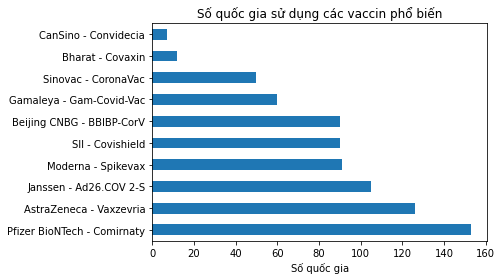

In [136]:
vaccin_df['VACCINES_USED'].str.split(',').explode().value_counts().head(10).plot.barh()
plt.xlabel('S·ªë qu·ªëc gia')
plt.title('S·ªë qu·ªëc gia s·ª≠ d·ª•ng c√°c vaccin ph·ªï bi·∫øn');

`Bar chart` n√†y cho th·∫•y Pfizer ƒë∆∞·ª£c s·ª≠ d·ª•ng r·ªông r√£i, b√°m theo sau l√† AstraZeneca.

<hr style="border:1px solid blue"> </hr>

## Kh√°m ph√° d·ªØ li·ªáu Vaccin COVID-19

### ƒê·ªçc d·ªØ li·ªáu t·ª´ file

ƒê·ªçc d·ªØ li·ªáu t·ª´ file `vaccination-metadata.csv` r·ªìi l∆∞u v√†o dataframe `metavaccin_df`.

In [137]:
metavaccin_df = pd.read_csv('dataset/vaccination-metadata.csv')
metavaccin_df.sample(5)

ISO3                 VACCINE_NAME   PRODUCT_NAME  \
312  HND  Pfizer BioNTech - Comirnaty      Comirnaty   
117  PHL    Beijing CNBG - BBIBP-CorV     BBIBP-CorV   
745  MAR       Janssen - Ad26.COV 2-S   Ad26.COV 2-S   
157  ARG      AstraZeneca - Vaxzevria      Vaxzevria   
65   GIN     Gamaleya - Gam-Covid-Vac  Gam-Covid-Vac   

                                         COMPANY_NAME AUTHORIZATION_DATE  \
312                                   Pfizer BioNTech                NaN   
117  Beijing Bio-Institute Biological Products (CNBG)         2021-06-07   
745                           Janssen Pharmaceuticals                NaN   
157                                       AstraZeneca         2021-12-20   
65                        Gamaleya Research Institute         2021-01-27   

     START_DATE  END_DATE  COMMENT DATA_SOURCE  
312         NaN       NaN      NaN   REPORTING  
117  2021-08-30       NaN      NaN   REPORTING  
745         NaN       NaN      NaN   REPORTING  
157  2021-03-30       NaN      NaN   REPORTING  
65   2021-03-05       NaN      NaN   REPORTING

### D·ªØ li·ªáu c√≥ bao nhi√™u d√≤ng v√† c·ªôt ?

T√≠nh s·ªë d√≤ng v√† s·ªë c·ªôt r·ªìi l∆∞u v√†o bi·∫øn `num_rows_metavaccin` v√† `num_cols_metavaccin`

In [138]:
num_rows_metavaccin , num_cols_metavaccin = metavaccin_df.shape
print(f'D·ªØ li·ªáu c√≥ {num_rows_metavaccin} d√≤ng')
print(f'D·ªØ li·ªáu c√≥ {num_cols_metavaccin} c·ªôt')

D·ªØ li·ªáu c√≥ 853 d√≤ng
D·ªØ li·ªáu c√≥ 9 c·ªôt


### M·ªói d√≤ng d·ªØ li·ªáu c√≥ √Ω nghƒ©a g√¨ ? C√≥ v·∫•n ƒë·ªÅ c√°c d√≤ng c√≥ √Ω nghƒ©a kh√°c nhau kh√¥ng ?

Theo quan s√°t s∆° b·ªô v√† file m√¥ t·∫£ d·ªØ li·ªáu tr√™n website ch√≠nh c·ªßa WHO th√¨ d·ªØ li·ªáu cho bi·∫øt th√¥ng tin v·ªÅ t√≠nh h√¨nh s·ª≠ d·ª•ng vaccin ·ªü c√°c qu·ªëc gia v·ªõi ng√†y ƒë∆∞·ª£c c·∫≠p nh·∫≠t g·∫ßn nh·∫•t.

### D·ªØ li·ªáu c√≥ b·ªã l·∫∑p kh√¥ng

T√≠nh s·ªë d√≤ng d·ªØ li·ªáu b·ªã tr√πng (n·∫øu c√≥) r·ªìi l∆∞u v√†o bi·∫øn `num_rows_dupicated`.

In [139]:
num_rows_duplicated = num_rows_metavaccin - len(metavaccin_df.drop_duplicates())
print(num_rows_duplicated)

0


### M·ªói c·ªôt c√≥ √Ω nghƒ©a g√¨ ?

D·ª±a v√†o m√¥ t·∫£ ch√≠nh th·ª©c tr√™n website WHO, √Ω nghƒ©a t·ª´ng c·ªôt ƒë∆∞·ª£c m√¥ t·∫£ trong file `Description_data.csv`

In [140]:
pd.set_option("display.max_colwidth",500)
description_data = pd.read_csv('dataset/Description_metadata.csv',
                                 delimiter= '\t',index_col= 'Field name')

In [141]:
description_data

Type  \
Field name                   
ISO3                String   
VACCINE_NAME        String   
PRODUCT_NAME        String   
COMPANY_NAME        String   
AUTHORIZATION_DATE    Date   
START_DATE            Date   
END_DATE              Date   
COMMENT             String   
DATA_SOURCE         String   

                                                                                                                                                                                                       Description  
Field name                                                                                                                                                                                                          
ISO3                                                                                                                                                                                      ISO Alpha-3 country code  
VACCINE_NAME                                                                                                                              Combined short name of vaccine: √¢¬Ä¬úCompany - Product name√¢¬Ä¬ù (see below)  
PRODUCT_NAME                                                                                                                                    Name or label of vaccine product, or type of vaccine (if unnamed).  
COMPANY_NAME                                                                                                                                                    Marketing authorization holder of vaccine product.  
AUTHORIZATION_DATE                                                                                                                    Date vaccine product was authorised for use in the country, territory, area.  
START_DATE                                                                                                      Start/launch date of vaccination with vaccine type (excludes vaccinations during clinical trials).  
END_DATE                                                                                                                                                                               End date of vaccine rollout  
COMMENT                                                                                                                                                                        Comments related to vaccine rollout  
DATA_SOURCE         Indicates data source - REPORTING: Data reported by Member States, or sourced from official reports - OWID: Data sourced from Our World in Data: https://ourworldindata.org/covid-vaccinations

### M·ªói c·ªôt hi·ªán t·∫°i ƒëang c√≥ d·ªØ li·ªáu g√¨ ?

In [142]:
metavaccin_df.dtypes

ISO3                   object
VACCINE_NAME           object
PRODUCT_NAME           object
COMPANY_NAME           object
AUTHORIZATION_DATE     object
START_DATE             object
END_DATE              float64
COMMENT               float64
DATA_SOURCE            object
dtype: object

`AUTHORIZATION_DATE`, `START_DATE`, `END_DATE`  n√™n c√≥ ki·ªÉu d·ªØ li·ªáu `datetime`\
`COMMENT` n√™n c√≥ d·ªØ li·ªáu l√† `object`

---
### Ti·ªÅn x·ª≠ l√Ω: Thay ƒë·ªïi ki·ªÉu d·ªØ li·ªáu

In [143]:
metavaccin_df = metavaccin_df.astype({'AUTHORIZATION_DATE': 'datetime64[ns]', 'START_DATE': 'datetime64[ns]',\
                                      'END_DATE': 'datetime64[ns]', 'COMMENT': 'str'})

In [144]:
assert metavaccin_df['AUTHORIZATION_DATE'].dtype == np.dtype('datetime64[ns]')
assert metavaccin_df['START_DATE'].dtype == np.dtype('datetime64[ns]')
assert metavaccin_df['END_DATE'].dtype == np.dtype('datetime64[ns]')
assert metavaccin_df['COMMENT'].dtype == np.dtype('object')

V·∫≠y **Ki·ªÉu d·ªØ li·ªáu kh√¥ng c√≥ g√¨ b·∫•t th∆∞·ªùng**

---
### Quay l·∫°i kh√°m ph√° d·ªØ li·ªáu: Ph√¢n b·ªë ki·ªÉu d·ªØ li·ªáu numerical

In [145]:
numerical_df = metavaccin_df.select_dtypes(['int64','float64','datetime64'])
numerical_df.agg([missing_ration,pd.Series.min,lower_quantile,
                  pd.Series.median,upper_quantile,pd.Series.max])

/home/lav/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


AUTHORIZATION_DATE           START_DATE END_DATE
missing_ration                 59.3                 33.9    100.0
min             2020-07-22 00:00:00  2020-07-22 00:00:00      NaT
lower_quantile  2021-01-29 12:00:00  2021-02-03 00:00:00      NaT
median          2021-02-24 00:00:00  2021-03-10 00:00:00      NaT
upper_quantile  2021-05-06 00:00:00  2021-04-28 00:00:00      NaT
max             2021-12-31 00:00:00  2021-11-14 00:00:00      NaT

V·∫≠y `END_DATE` ch·ª©a to√†n r·ªóng. N√™n ta s·∫Ω lo·∫°i b·ªè

---
### Ti·ªÅn x·ª≠ l√≠: Lo·∫°i b·ªè c·ªôt NaN

In [146]:
metavaccin_df = metavaccin_df.drop(columns=['END_DATE'])

In [147]:
assert 'END_DATE' not in metavaccin_df.columns

---
### Quay l·∫°i kh√°m ph√°: Ph√¢n b·ªë ki·ªÉu d·ªØ li·ªáu categorical

In [148]:
pd.set_option("display.max_colwidth",51)
categorical_df = metavaccin_df.select_dtypes(['object'])
categorical_df.agg([missing_ration,pd.Series.unique,pd.Series.nunique])

ISO3  \
missing_ration                                                 0.0   
unique          [JEY, GGY, SHN, RUS, IMN, GIB, GRL, FRO, TUR, F...   
nunique                                                        225   

                                                      VACCINE_NAME  \
missing_ration                                                 0.0   
unique          [Moderna - mRNA-1273, AstraZeneca - AZD1222, Pf...   
nunique                                                         25   

                                                      PRODUCT_NAME  \
missing_ration                                                 0.0   
unique          [mRNA-1273, AZD1222, Comirnaty, EpiVacCorona, C...   
nunique                                                         24   

                                                      COMPANY_NAME COMMENT  \
missing_ration                                                 0.5     0.0   
unique          [Moderna, AstraZeneca, Pfizer BioNTech, State R...   [nan]   
nunique                                                         19       1   

                      DATA_SOURCE  
missing_ration                0.0  
unique          [OWID, REPORTING]  
nunique                         2

V·∫Ω `barh chart` cho top 10 `COMPANY_NAME`

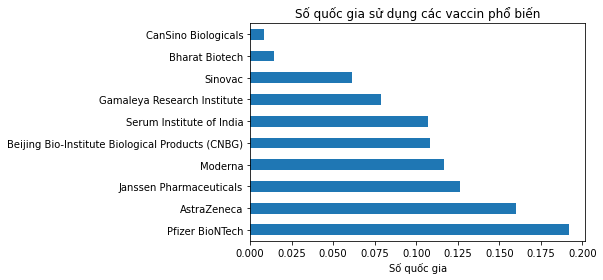

In [149]:
metavaccin_df['COMPANY_NAME'].value_counts(normalize=True).head(10).plot.barh()
plt.xlabel('S·ªë qu·ªëc gia')
plt.title('S·ªë qu·ªëc gia s·ª≠ d·ª•ng c√°c vaccin ph·ªï bi·∫øn');

`Bar chart` n√†y cho th·∫•y s·ª± h·ª£p l√≠ khi Pfizer BioNTech v√† AstraZeneca ti·∫øp t·ª•c ƒë·ª©ng ƒë·∫ßu.

---

# ƒê∆∞a ra c√°c c√¢u h·ªèi c·∫ßn tr·∫£ l·ªùi

## C√°c v·∫•n ƒë·ªÅ v·ªÅ d·ªãnh b·ªánh covid

Sau khi kh√°m ph√° ƒë·ªÉ hi·ªÉu h∆°n v·ªÅ d·ªØ li·ªáu c√πng nh∆∞ tin t·ª©c qua m·∫°ng x√£ h·ªôi, b√°o ch√≠,... Ta c√≥ m·ªôt v√†i v·∫•n ƒë·ªÅ c·∫ßn ki·ªÉm ch·ª©ng v√† ƒëi s√¢u h∆°n v√†o kh√°m ph√°: 
- NƒÉm `2020` l√† nƒÉm m√† ƒë·∫°i d·ªãch covid-19 l√¢y lan nhanh ch√≥ng ·ªü c√°c qu·ªëc gia ·ªü `Ch√¢u √Çu, M·ªπ Latin` tr∆∞·ªõc khi vacxin ƒë∆∞·ª£c ph·ªï bi·∫øn v√† d·ªãch b·ªánh t·∫°m ki·ªÅm ch·∫ø v√†o ƒë·∫ßu nƒÉm 2021. 
- Trong khi ƒë√≥, nƒÉm `2021` l·∫°i l√† nƒÉm m√† d·ªãch covid-19 l√¢y lan v·ªõi m·ª©c ƒë·ªô kh·ªßng khi·∫øp ·ªü c√°c n∆∞·ªõc `ch√¢u √Å`.
- M·ªπ l√† qu·ªëc gia c√≥ s·ªë ca nhi·ªÖm v√† t·ª≠ vong cao nh·∫•t; ti·∫øp ƒë·∫øn l√† ·∫§n ƒê·ªô, Brazil...
- D·ªãch b·ªánh covid_19 c√≥ kh·∫£ nƒÉng b√πng ph√°t m·∫°nh v√†o m√πa l·∫°nh.
- D·ªãch b·ªánh covid_19 ·ªü Vi·ªát Nam trong giai ƒëo·∫°n 4 b√πng ph√°t r·∫•t m·∫°nh, t√≠nh t·ª´ 05/2021

V·∫≠y ta s·∫Ω tr·∫£ l·ªùi nh·ªØng c√¢u h·ªèi sau ƒë·ªÉ ki·ªÉm ch·ª©ng nh·ªØng nh·∫≠n ƒë·ªãnh tr√™n:

>1. T√¨nh h√¨nh d·ªãch b·ªánh ·ªü c√°c khu v·ª±c tr√™n th·∫ø gi·ªõi trong hai nƒÉm 2020,2021.
>2. T√¨nh h√¨nh d·ªãch b·ªánh ·ªü n∆∞·ªõc c√≥ s·ªë ca nhi·ªÖm cao nh·∫•t th·∫ø gi·ªõi, cao th·ª© hai th·∫ø gi·ªõi,...\
X√°c ƒë·ªãnh ƒë·ªânh ƒëi·ªÉm c·ªßa d·ªãch t·∫°i c√°c qu·ªëc gia tr√™n r·ªìi li√™n h·ªá v·ªõi ƒëi·ªÅu ki·ªán kh√≠ h·∫≠u t·∫°i th·ªùi ƒëi·ªÉm ƒë√≥.
>3. T√¨nh h√¨nh d·ªãch b·ªánh ·ªü Vi·ªát Nam thay ƒë·ªïi nh∆∞ th·∫ø n√†o ƒë·∫øn tr∆∞·ªõc v√† sau `01/05/2021`. 

## C√°c v·∫•n ƒë·ªÅ v·ªÅ vaccine

D·ª±a v√†o th√¥ng tin d·ªØ li·ªáu v·ªÅ vacinne m√† em ƒë√£ kh√°m ph√° tr∆∞·ªõc ƒë√≥, ƒë√¢y l√† 2 c√¢u h·ªèi m√† em nghƒ© d·ªØ li·ªáu s·∫Ω ƒë·ªß ƒë·ªÉ tr·∫£ l·ªùi.

> 4. T√¨nh h√¨nh ti√™m ch·ªßng gi·ªØa c√°c qu·ªëc gia.
> 5. ƒê·ªô ph·ªï bi·∫øn c·ªßa top 5 lo·∫°i vaccin ph·ªï bi·∫øn qua t·ª´ng th·ªùi ƒëi·ªÉm.

C√°c c√¢u h·ªèi tr√™n nh·∫±m tr·∫£ l·ªùi c√°c m·ª•c ƒë√≠ch sau:
- Qua t√¨nh h√¨nh ti√™m ch·ªßng gi·ªØa c√°c qu·ªëc gia. Ta nh√¨n ƒë∆∞·ª£c s·ª± ph√¢n b·ªë vaccin gi·ªØa c√°c n∆∞·ªõc, sau ƒë√≥ c√≥ th·ªÉ r√∫t ƒë∆∞·ª£c c√°c quy lu·∫≠t n√†o kh√¥ng. \
    **V√≠ d·ª•:** n∆∞·ªõc t·ª± do th√¨ kh√¥ng ti√™m vaccin, n∆∞·ªõc ƒë·ªôc t√†i th√¨ t·ªâ l·ªá ti√™m cao, n∆∞·ªõc ngh√®o kh√¥ng ti·∫øp c·∫≠n ƒë∆∞·ª£c vaccin .. vv... B√™n c·∫°nh ƒë√≥, vi·ªác tr·∫£ l·ªùi c√¢u h·ªèi n√†y c≈©ng gi√∫p ch√∫ng ta bi·∫øt n√™n ƒëi du l·ªãch n∆∞·ªõc n√†o v·ªùi th·ªùi ƒëi·ªÉm n√†y üòÑ
- Khi tr·∫£ l·ªùi ƒë∆∞·ª£c c√¢u h·ªèi th·ª© 5, ch√∫ng ta s·∫Ω bi·∫øt ƒë∆∞·ª£c t·ªëc ƒë·ªô ph·ªß vaccin c·ªßa c√°c lo·∫°i vaccin. V√† s·∫Ω c√≥ ƒë∆∞·ª£c c√°i nh√¨n t·ªïng quan h∆°n v·ªÅ t√¨nh h√¨nh s·ª≠ d·ª•ng vaccin tr√™n th·∫ø gi·ªõi.

---
# Ti·ªÅn x·ª≠ l√Ω + Ph√¢n t√≠ch d·ªØ li·ªáu

- T·ªâ s·ªë <font size = '4'>$\frac{\text{total_deaths}}{\text{total_ cases}}$</font> r·∫•t quan tr·ªçng trong vi·ªác ƒë√°nh gi√° m·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng c·ªßa d·ªãch b·ªánh covid-19 t·ªõi m·ªôt qu·ªëc gia. Ta s·∫Ω th√™m v√†o DataFrame `global_table_df` c·ªôt `covid_rating`.


- ƒê·ªëi v·ªõi qu·ªëc gia ch∆∞a c√≥ ca nhi·ªÖm hay t·ª≠ vong th√¨ t·ªâ l·ªá n√†y l√† `NaN` n√™n ch√∫ng ta s√© g√°n l·∫°i b·∫±ng 0.

In [150]:
global_table_df['covid_rating'] = (global_table_df['Deaths - cumulative total'] \
                                 / global_table_df['Cases - cumulative total']) * 100

global_table_df.loc[global_table_df['covid_rating'].isna(),'covid_rating'] = 0

---
## C√¢u h·ªèi s·ªë 1: T√¨nh h√¨nh d·ªãch b·ªánh ·ªü c√°c khu v·ª±c tr√™n th·∫ø gi·ªõi trong hai nƒÉm 2020, 2021 ?

ƒê·ªÉ tr·∫£ l·ªùi c√¢u h·ªèi n√†y, ta c√≥ c√°c b∆∞·ªõc sau:
- B∆∞·ªõc 1: Th√™m c·ªôt `Year` v√†o DataFrame `global_df`
- B∆∞·ªõc 2: merge WHO Region 2 DataFrame `global_df` v√† `global_table_df` theo t√™n qu·ªëc gia. WHO Region r√∫t g·ªçn s·∫Ω g√¢y kh√≥ hi·ªÉu cho ng∆∞·ªùi ƒë·ªçc.
- B∆∞·ªõc 3: L∆∞u v√†o dataframe `areas_covid_19` g·ªìm 7 d√≤ng v√† 4 c·ªôt. 
    - M·ªói d√≤ng t∆∞∆°ng ·ª©ng v·ªõi 1 khu v·ª±c theo ph√¢n chia c·ªßa WHO
    - M·ªói c·ªôt t∆∞∆°ng ·ª©ng l√† s·ªë ca m·∫Øc m·ªõi v√† s·ªë ca t·ª≠ vong c·ªßa t·ª´ng khu v·ª±c trong 2 nƒÉm 2020, 2021
- B∆∞·ªõc 4: V·∫Ω bar chart `t·ªâ l·ªá %` t·ª´ng khu v·ª±c theo s·ªë ca nhi·ªÖm v√† t·ª≠ vong, t·ª´ ƒë√≥ ƒë∆∞a ra nh·∫≠n x√©t

**Code b∆∞·ªõc 1**

In [151]:
Year = global_df["Date_reported"].dt.year
global_df["Year"] = Year

**Code b∆∞·ªõc 2**

In [152]:
df1 = global_df[['Country','WHO_region','Year','New_cases','New_deaths']]
df2 = global_table_df[['WHO Region']]

# merge theo c·ªôt 'Name' c·ªßa global_table_df v√† c·ªôt 'Country' c·ªßa global_df
df = df2.merge(df1,left_on = 'Name',right_on = 'Country').drop(columns = ['WHO_region'])

**Code b∆∞·ªõc 3**

In [153]:
areas_covid_19 = df.groupby(["WHO Region","Year"]).sum()
areas_covid_19 = areas_covid_19.unstack(1)
areas_covid_19

New_cases             New_deaths           
Year                         2020        2021       2020       2021
WHO Region                                                         
Africa                  1895471.0   4421390.0    42211.0   110942.0
Americas               35734517.0  61591564.0   951786.0  1403842.0
Eastern Mediterranean   4912291.0  11902799.0   120880.0   189320.0
Europe                 27235606.0  60951030.0   583057.0   979147.0
Other                       745.0        19.0       13.0        0.0
South-East Asia        11973259.0  32632558.0   184188.0   524081.0
Western Pacific         1087675.0   9224698.0    20044.0   123051.0

**Code b∆∞·ªõc 4**

**1. V·∫Ω bar chart cho s·ªë ca nhi·ªÖm m·ªõi**

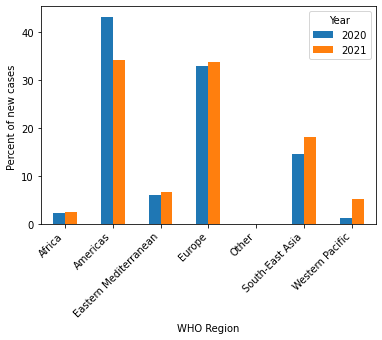

In [154]:
x_axis = areas_covid_19.index
y_axis_cases = (areas_covid_19.loc[:,('New_cases')] / areas_covid_19.loc[:,('New_cases')].sum()) * 100
y_axis_cases.plot.bar()
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.ylabel('Percent of new cases ');

**2. V·∫Ω bar chart cho s·ªë ca t·ª≠ vong**

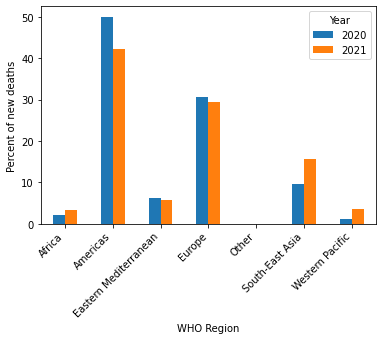

In [155]:
x_axis = areas_covid_19.index
y_axis_deaths = (areas_covid_19.loc[:,('New_deaths')] / areas_covid_19.loc[:,('New_deaths')].sum()) * 100
y_axis_deaths.plot.bar()
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.ylabel('Percent of new deaths');

Nh·∫≠n x√©t: H√¨nh v·∫Ω bi·ªÖu di·ªÖn kh√° tr·ª±c quan v·ªÅ s·ª± b√πng ph√°t d·ªãch b·ªánh covid_19 ·ªü t·ª´ng khu v·ª±c trong nƒÉm 2020 v√† 2021
- Nh√¨n chung, nƒÉm 2020 ƒë√∫ng l√† nƒÉm d·ªãch b·ªánh b√πng ph√°t m·∫°nh ·ªü ch√¢u M·ªπ v√† Ch√¢u √Çu, trong nƒÉm 2020 th√¨ ch√¢u M·ªπ ƒë√£ chi·∫øm g·∫ßn 50% s·ªë t·ª≠ vong v√† h∆°n 40 % s·ªë ca m·∫Øc tr√™n th·∫ø gi·ªõi.
- Ri√™ng ch√¢u M·ªπ th√¨ qua nƒÉm 2021, s·ªë ca t·ª≠ vong v√† ca nhi·ªÖm c√≥ xu h∆∞·ªõng gi·∫£m nh∆∞ng v·∫´n c√≤n kh√° cao so v·ªõi khu v·ª±c kh√°c.
- NƒÉm 2021 th√¨ ch√¢u √Å, ƒë·∫∑c bi·ªát khu v·ª±c `ƒê√¥ng Nam √Å` d·ªãch b·ªánh b√πng ph√°t m·∫°nh. Ch√¢u √Çu th√¨ t·ªâ l·ªá thay ƒë·ªïi kh√¥ng qu√° nhi·ªÅu. 

üëçüëçüëç

---
## C√¢u h·ªèi s·ªë 2: T√¨nh h√¨nh d·ªãch covid 19 di·ªÖn bi·∫øn x·∫•u nh·∫•t ·ªü nh·ªØng qu·ªëc gia n√†o ? C√≥ m·ªëi li√™n h·ªá gi·ªØa th·ªùi gian d·ªãch ƒë·∫°t ƒë·ªânh v·ªõi kh√≠ h·∫≠u hay kh√¥ng ?


Ta chia c√¢u h·ªèi tr√™n l√†m 2 ph·∫ßn:
- Ph·∫ßn 1: X√°c ƒë·ªãnh qu·ªëc gia n√†o c√≥ s·ªë ca nhi·ªÖm cao nh·∫•t, qu·ªëc gia n√†o c√≥ s·ªë ca nhi·ªÖm cao nh√¨,...
    - B∆∞·ªõc 1: L∆∞u v√†o DataFrame `highest_case_country` g·ªìm 10 qu·ªëc gia c√≥ s·ªë ca nhi·ªÖm cao nh·∫•t. \
      Ch√∫ng ta s·∫Ω kh√¥ng x√©t d√≤ng index `Global` 
    - B∆∞·ªõc 2: V·∫Ω radar chart `t·ªâ l·ªá` c√°c th√¥ng s·ªë 2 qu·ªëc gia ƒë·ª©ng ƒë·∫ßu, t·ª´ ƒë√≥ r√∫t ra nh·∫≠n x√©t.
        - Chu·∫©n ho√° d·ªØ li·ªáu v·ªÅ t·ªâ l·ªá.
        - V·∫Ω `radar chart`.
- Ph·∫ßn 2: X√°c ƒë·ªãnh ƒë·ªânh d·ªãch ·ªü M·ªπ v√† ·∫§n ƒê·ªô r·ªìi li√™n h·ªá v·ªõi th·ªùi ti·∫øt.
    - B∆∞·ªõc 1: L∆∞u v√†o DataFrame `covid_19_monthly`
        - T√™n d√≤ng ph√¢n c·∫•p theo th·ª© t·ª±: t√™n qu·ªëc gia , Month
        - T√™n c·ªôt ph√¢n c·∫•p theo th·ª© t·ª±: new_cases / new_deaths, Year
    - B∆∞·ªõc 2: 
        - V·∫Ω `line chart` s·ªë ca nhi·ªÖm m·ªõi v√† s·ªë ca t·ª≠ vong
        - V·∫Ω `pie chart` t·ªâ l·ªá s·ªë ca nhi·ªÖm theo m√πa, t·ª´ ƒë√≥ r√∫t ra r√∫t ra nh·∫≠n x√©t

---
### X√°c ƒë·ªãnh c√°c qu·ªëc gia c√≥ s·ªë ca nhi·ªÖm cao.

**Code b∆∞·ªõc 1**

In [156]:
highest_case_country = global_table_df.drop(index = ['Global'])
highest_case_country = highest_case_country.sort_values(by = ['Cases - cumulative total'],
                                                        ascending = False).head(10)
highest_case_country.head(5)

WHO Region  Cases - cumulative total  \
Name                                                                  
United States of America         Americas                  48413265   
India                     South-East Asia                  34615757   
Brazil                           Americas                  22105872   
The United Kingdom                 Europe                  10329078   
Russian Federation                 Europe                   9736037   

                          Cases - cumulative total per 100000 population  \
Name                                                                       
United States of America                                       14626.247   
India                                                           2508.380   
Brazil                                                         10399.855   
The United Kingdom                                             15215.328   
Russian Federation                                              6671.513   

                          Cases - newly reported in last 7 days  \
Name                                                              
United States of America                                 605870   
India                                                     60326   
Brazil                                                    62760   
The United Kingdom                                       307577   
Russian Federation                                       233158   

                          Cases - newly reported in last 7 days per 100000 population  \
Name                                                                                    
United States of America                                             183.041            
India                                                                  4.371            
Brazil                                                                29.526            
The United Kingdom                                                   453.079            
Russian Federation                                                   159.769            

                          Cases - newly reported in last 24 hours  \
Name                                                                
United States of America                                   131187   
India                                                        9216   
Brazil                                                      11413   
The United Kingdom                                          53067   
Russian Federation                                          32930   

                          Deaths - cumulative total  \
Name                                                  
United States of America                     778336   
India                                        470115   
Brazil                                       614964   
The United Kingdom                           145281   
Russian Federation                           278857   

                          Deaths - cumulative total per 100000 population  \
Name                                                                        
United States of America                                          235.145   
India                                                              34.066   
Brazil                                                            289.314   
The United Kingdom                                                214.007   
Russian Federation                                                191.084   

                          Deaths - newly reported in last 7 days  \
Name                                                               
United States of America                                    6388   
India                                                       2647   
Brazil                                                      1625   
The United Kingdom                                           848   
Russian Federation                                          8565   

                   

- C√≥ th·ªÉ th·∫•y 3 qu·ªëc gia ƒë·ª©ng ƒë·∫ßu v·ªÅ s·ªë ca m·∫Øc l·∫ßn l∆∞·ª£t l√† `M·ªπ`, `·∫§n ƒê·ªô` v√† `Brazil`. üëçüëçüëç
- Brazil v√† Russian c√≥ s·ªë ca nhi·ªÖm th·∫•p h∆°n nh∆∞ng t·ªâ l·ªá t·ª≠ vong l·∫°i r·∫•t cao. üò•üò•üò•

**Code b∆∞·ªõc 2**

1. Chu·∫©n b·ªã d·ªØ li·ªáu v√† chu·∫©n ho√° v·ªÅ t·ªâ l·ªá

In [157]:
# t√™n c√°c c·ªôt c·∫ßn c·ªôt x√©t
categorical = ['Cases - total', 'Cases - last 7days', 
               'Cases - last 24h','Deaths - total', 
               'Deaths - last 7days','Deaths - last 24h','Covid_rating']

# d·ªØ li·ªáu c·∫ßn x√©t
data = highest_case_country.head(2)[['Cases - cumulative total',
                                     'Cases - newly reported in last 7 days',
                                     'Cases - newly reported in last 24 hours',
                                     'Deaths - cumulative total',
                                     'Deaths - newly reported in last 7 days',
                                     'Deaths - newly reported in last 24 hours',
                                     'covid_rating']]

# chu·∫©n ho√° c√°c c·ªôt v·ªÅ t·ªâ l·ªá  
data /= data.sum(axis = 0)

# t·∫°o ra c√°c cung tr√≤n b·∫±ng nhau ƒë·ªÉ v·∫Ω radar chart
angles = [n / float(len(categorical)) * 2 * math.pi for n in range(len(categorical))]
angles += angles[:1] # ƒë∆∞·ªùng cu·ªëi c·ªßa radar chart

scale_America = data.iloc[0].values.tolist()
scale_America.append(scale_America[0])  # th√™m ƒë∆∞·ªùng cu·ªëi c·ªßa radar chart
scale_India = data.iloc[1].values.tolist()
scale_India.append(scale_India[0])

2. V·∫Ω radar chart

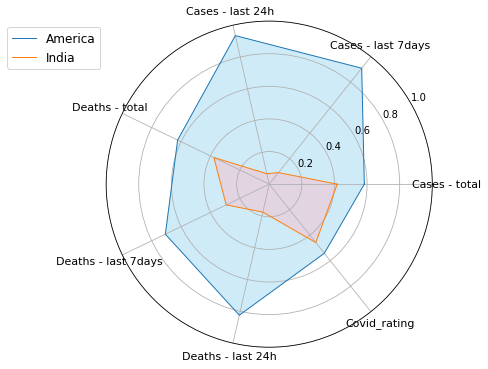

In [158]:
# t·∫°o khung tr√≤n k√≠ch th∆∞·ªõc 6x6
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6),
                       subplot_kw = dict(polar=True))
# Figure 1: 
# draw
ax.plot(angles,scale_America,linewidth = 1,
       linestyle = 'solid' , label = 'America')
# fill m√†u
ax.fill(angles, scale_America, 'skyblue', alpha=0.4)

# Figure 2:
# draw
ax.plot(angles,scale_India,linewidth = 1,
       linestyle = 'solid' , label = 'India')
# fill m√†u
ax.fill(angles, scale_India, 'lightpink', alpha=0.4)

# setup
plt.ylim(0, 1)
plt.xticks(angles[:-1], categorical,
           color='black', size = 11)
plt.legend( bbox_to_anchor = (0,1),   # bbox_to_anchor set possion of legend
            prop={'size': 12})        # set size of legend
ax.set_rlabel_position(30)            # set rotation of label scale

plt.show()

**Nh·∫≠n x√©t:**
- C√°c th√¥ng s·ªë c·ªßa M·ªπ ƒë·ªÅu `r·∫•t cao` v√† `ph√¢n b·ªë kh√° ƒë·ªÅu` ·ªü t·∫•t c·∫£ c√°c th√¥ng s·ªë so v·ªõi ·∫§n ƒê·ªô.
- Trong khi ƒë√≥, ·∫§n ƒê·ªô l·∫°i l·ªách v·ªÅ `t·ªïng s·ªë ca nhi·ªÖm` v√† c√°c th√¥ng s·ªë v·ªÅ `s·ªë ca t·ª≠ vong`.
- T·ªâ l·ªá t·ª≠ vong c·ªßa ·∫§n ƒê·ªô kh√° cao, g·∫ßn x·∫•p x·ªâ v·ªõi M·ªπ m·∫∑c d√π M·ªπ c√≥ s·ªë ca nhi·ªÖm, s·ªë ca t·ª≠ vong cao h∆°n.

---
### X√°c ƒë·ªãnh ƒë·ªânh d·ªãch t·∫°i M·ªπ v√† ·∫§n ƒê·ªô

**Code b∆∞·ªõc 1**

In [159]:
df = global_df[(global_df['Country'] == 'United States of America') 
               | (global_df['Country'] == 'India')]

df = df[['Country','New_cases','New_deaths','Month','Year']]
df = df.groupby(['Country','Year','Month']).sum()
covid_19_monthly = df.unstack(level = 1)

covid_19_monthly.head(5)

New_cases            New_deaths          
Year               2020       2021       2020      2021
Country Month                                          
India   1           5.0   479509.0        0.0    5536.0
        2           2.0   350548.0        0.0    2777.0
        3        1244.0  1052604.0       32.0    5417.0
        4       31799.0  6613641.0     1042.0   45862.0
        5      149093.0  9284558.0     4090.0  120770.0

**Code b∆∞·ªõc 2**

#### **T·∫°i M·ªπ**

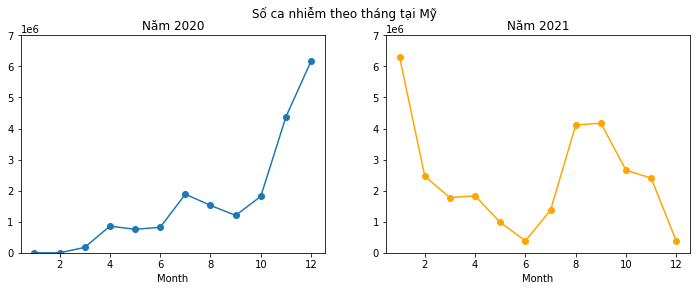

In [160]:
fig, axs = plt.subplots(1,2,figsize = (12,4))

covid_19_monthly.loc['United States of America', 
                     ('New_cases',2020)].plot.line(marker = 'o',ax = axs[0])

covid_19_monthly.loc['United States of America', 
                     ('New_cases',2021)].plot.line(marker = 'o',color = 'orange',ax = axs[1])

axs[0].set_ylim(0,7e6)
axs[1].set_ylim(0,7e6)
plt.sca(axs[0])
plt.title('NƒÉm 2020')
plt.sca(axs[1])
plt.title('NƒÉm 2021')
plt.suptitle('S·ªë ca nhi·ªÖm theo th√°ng t·∫°i M·ªπ');

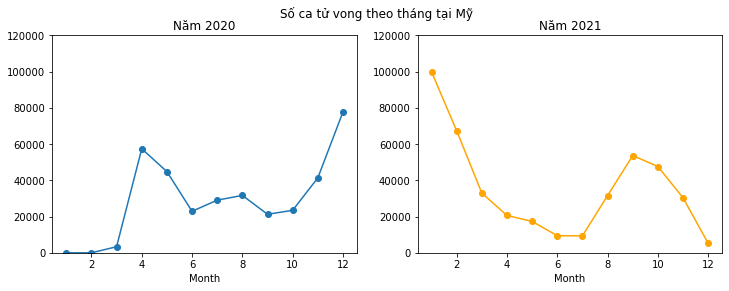

In [161]:
fig, axs = plt.subplots(1,2,figsize = (12,4))

covid_19_monthly.loc['United States of America', 
                     ('New_deaths',2020)].plot.line(marker = 'o',ax = axs[0])

covid_19_monthly.loc['United States of America', 
                     ('New_deaths',2021)].plot.line(marker = 'o',color = 'orange',ax = axs[1])

axs[0].set_ylim(0,1.2e5)
axs[1].set_ylim(0,1.2e5)
plt.sca(axs[0])
plt.title('NƒÉm 2020')
plt.sca(axs[1])
plt.title('NƒÉm 2021')
plt.suptitle('S·ªë ca t·ª≠ vong theo th√°ng t·∫°i M·ªπ');

Nh·∫≠n x√©t:
- ƒê·ªânh d·ªãch ·ªü M·ªπ r∆°i v√†o kho·∫£ng th·ªùi gian `11/2020 ƒë·∫øn 02/2021`.
- Theo th√¥ng tin m√† em bi·∫øt th√¨ kho·∫£ng th·ªùi gian n√†y ·ªü M·ªπ r∆°i v√†o `cu·ªëi thu v√† m√πa ƒë√¥ng` <font size = '4'> $\rightarrow$ </font> Kh√≠ h·∫≠u r·∫•t l·∫°nh. üëçüëçüëç

#### **V·∫Ω pie chart t√¨nh h√¨nh d·ªãch b·ªánh t·∫°i M·ªπ theo m√πa**


·ªû M·ªπ c√≥ 4 m√πa:
- M√πa xu√¢n: 3-5 <font size = '4'> &#8594;</font> kh√≠ h·∫≠u ·∫•m √°p
- M√πa h√®: 6-8 <font size = '4'> &#8594;</font> kh√≠ h·∫≠u n·∫Øng n√≥ng
- M√πa thu: 9-11 <font size = '4'> &#8594;</font> kh√≠ h·∫≠u m√°t m·∫ª
- M√πa ƒë√¥ng: 12-2 <font size = '4'> &#8594;</font> kh√≠ h·∫≠u l·∫°nh

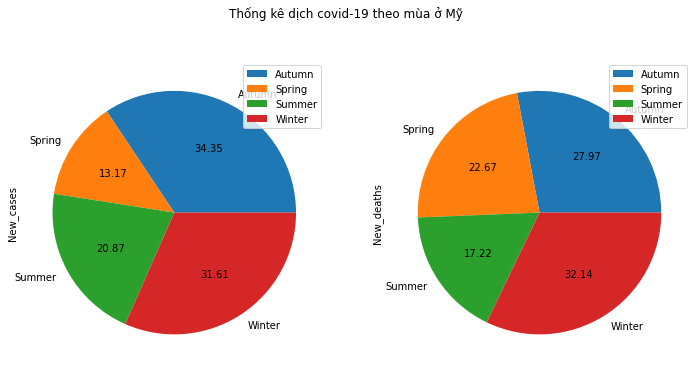

In [162]:
season_df = global_df[(global_df['Country'] == 'United States of America')]
season_df = season_df[['New_cases','New_deaths','Month']]

season_df.loc[(season_df['Month'] >= 3) & (season_df['Month'] < 6),['season']] = 'Spring'
season_df.loc[(season_df['Month'] >= 6) & (season_df['Month'] < 9),['season']] = 'Summer'
season_df.loc[(season_df['Month'] >= 9) & (season_df['Month'] < 12),['season']] = 'Autumn'
season_df.loc[(season_df['Month'] >= 12) | (season_df['Month'] < 3),['season']] = 'Winter'

season_df = season_df.drop(columns= ['Month'])
season_df = season_df.groupby('season').sum()
season_df.plot.pie(subplots = True, figsize = (12,6),autopct='%.2f')
plt.suptitle('Th·ªëng k√™ d·ªãch covid-19 theo m√πa ·ªü M·ªπ');

Nh·∫≠n x√©t: 
- D·ªãch b·ªánh ·ªü M·ªπ b√πng ph√°t m·∫°nh v√†o m√πa thu ƒë√¥ng, ƒë·∫∑c bi·ªát l√† v√†o m√πa ƒë√¥ng.

#### **T·∫°i ·∫§n ƒê·ªô**

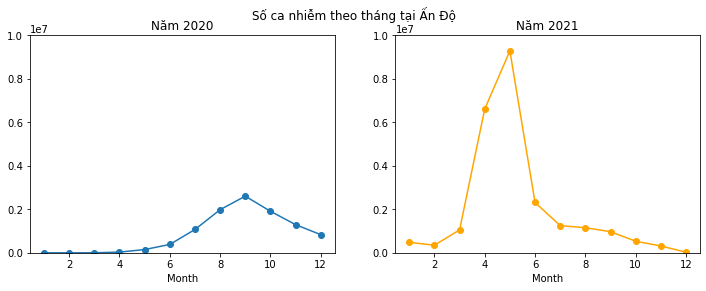

In [163]:
fig, axs = plt.subplots(1,2,figsize = (12,4))

covid_19_monthly.loc['India', 
                     ('New_cases',2020)].plot.line(marker = 'o',ax = axs[0])

covid_19_monthly.loc['India', 
                     ('New_cases',2021)].plot.line(marker = 'o',color = 'orange',ax = axs[1])

axs[0].set_ylim(0,1e7)
axs[1].set_ylim(0,1e7)
plt.sca(axs[0])
plt.title('NƒÉm 2020')
plt.sca(axs[1])
plt.title('NƒÉm 2021')
plt.suptitle('S·ªë ca nhi·ªÖm theo th√°ng t·∫°i ·∫§n ƒê·ªô');

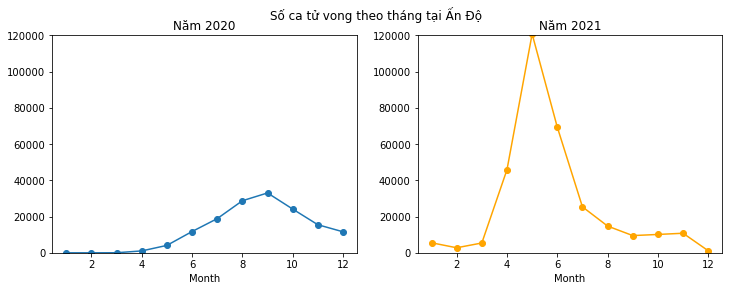

In [164]:
fig, axs = plt.subplots(1,2,figsize = (12,4))

covid_19_monthly.loc['India', 
                     ('New_deaths',2020)].plot.line(marker = 'o',ax = axs[0])

covid_19_monthly.loc['India', 
                     ('New_deaths',2021)].plot.line(marker = 'o',color = 'orange',ax = axs[1])

axs[0].set_ylim(0,1.2e5)
axs[1].set_ylim(0,1.2e5)
plt.sca(axs[0])
plt.title('NƒÉm 2020')
plt.sca(axs[1])
plt.title('NƒÉm 2021')
plt.suptitle('S·ªë ca t·ª≠ vong theo th√°ng t·∫°i ·∫§n ƒê·ªô');

Nh·∫≠n x√©t:
- ƒê·ªânh d·ªãch t·∫°i ·∫§n ƒê·ªô r∆°i v√†o kho·∫£ng th·ªùi gian `04/2021 ƒë·∫øn 06/2021`.
- T·∫°i ·∫§n ƒê·ªô th√¨ ƒë√¢y ƒëang l√† m√πa h√® <font size = '4'> &#8594;</font> Kh√≠ h·∫≠u r·∫•t n√≥ng.
- Nh∆∞ v·∫≠y nh·∫≠n ƒë·ªãnh covid-19 ph√°t tri·ªÖn m·∫°nh trong th·ªùi ti·∫øt l·∫°nh ch∆∞a ƒë√∫ng cho ·∫§n ƒê·ªô. Nh∆∞ng em nghƒ© gi·ªØa covid-19 v√† th·ªùi ti·∫øt v·∫´n c√≥ m·ªëi li√™n h·ªá nh·∫•t ƒë·ªãnh.

#### **V·∫Ω pie chart t√¨nh h√¨nh covid-19 theo m√πa ·ªü ·∫§n ƒê·ªô**

·ªû ·∫§n ƒê·ªô c√≥ 4 m√πa:
- M√πa ƒë√¥ng: 12-2 <font size = '4'> &#8594;</font> kh√≠ h·∫≠u kh√° l·∫°nh
- M√πa h√®: 3-5 <font size = '4'> &#8594;</font> kh√≠ h·∫≠u n·∫Øng n√≥ng
- M√πa m∆∞a: 6-8 <font size = '4'> &#8594;</font> m∆∞a nhi·ªÅu, kh√° m√°t m·∫ª
- M√πa h·∫≠u m∆∞a: 9-11 <font size = '4'> &#8594;</font> kh√≠ h·∫≠u m√°t m·∫ª

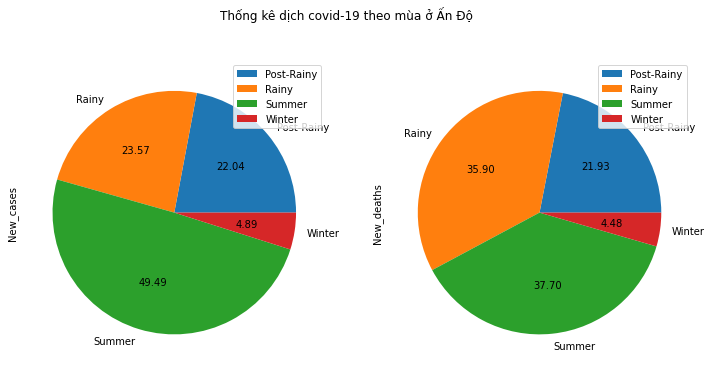

In [165]:
season_df = global_df[(global_df['Country'] == 'India')]
season_df = season_df[['New_cases','New_deaths','Month']]

season_df.loc[(season_df['Month'] >= 3) & (season_df['Month'] < 6),['season']] = 'Summer'
season_df.loc[(season_df['Month'] >= 6) & (season_df['Month'] < 9),['season']] = 'Rainy'
season_df.loc[(season_df['Month'] >= 9) & (season_df['Month'] < 12),['season']] = 'Post-Rainy'
season_df.loc[(season_df['Month'] >= 12) | (season_df['Month'] < 3),['season']] = 'Winter'

season_df = season_df.drop(columns= ['Month'])
season_df = season_df.groupby('season').sum()
season_df.plot.pie(subplots = True, figsize = (12,6),autopct='%.2f')
plt.suptitle('Th·ªëng k√™ d·ªãch covid-19 theo m√πa ·ªü ·∫§n ƒê·ªô');

Nh·∫≠n x√©t:
- Kh√°c v·ªõi M·ªπ, s·ªë ca nhi·ªÖm v√† t·ª≠ vong ·ªü ·∫§n ƒê·ªô b√πng ph√°t m·∫°nh v√†o m√πa h√®.

#### D∆∞·ªõi ƒë√¢y l√† m·ªôt s·ªë nguy√™n nh√¢n d·ªãch b·ªánh b√πng ph√°t ·ªü ·∫§n ƒê·ªô do ch√∫ng em t√¨m hi·ªÉu v√† ƒë∆∞a ra:
- D·ªãch b·ªánh covid-19 bi·∫øn ƒë·ªïi nhanh ch√≥ng ƒë·ªÉ th√≠ch ·ª©ng v·ªõi m·ªçi ki·ªÉu kh√≠ h·∫≠u, th·ªùi ti·∫øt (Delta, Delta-plus,...)
- S·ª± ch·ªß quan c·ªßa ng∆∞·ªùi d√¢n, h·∫±ng nƒÉm ng∆∞·ªùi ·∫§n ƒê·ªô s·∫Ω t·ªï ch·ª©c `l·ªÖ h·ªôi t·∫Øm s√¥ng` H·∫±ng t·ª´ `01/04 - 27/04`. üò•üò•üò•

---

## C√¢u h·ªèi s·ªë 3: T√¨nh h√¨nh d·ªãch b·ªánh covid-19 ·ªü Vi·ªát Nam tr∆∞·ªõc v√† sau 5/2021.

- Ph·∫ßn 1: T√¨nh h√¨nh d·ªãch covid-19 ·ªü Vi·ªát Nam. L∆∞u k·∫øt qu·∫£ v√†o DataFrame `vietnam_df`g·ªìm
    - C√°c d√≤ng ph√¢n c·∫•p theo th·ª© t·ª±: Year / Month
    - C√°c c·ªôt g·ªìm s·ªë ca nhi·ªÖm m·ªõi, s·ªë ca t·ª≠ vong v√† t·ªâ l·ªá t·ª≠ vong.
- Ph·∫ßn 2: Chu·∫©n b·ªã d·ªØ li·ªáu v·ªÅ t√¨nh h√¨nh d·ªãch covid-19 ·ªü Vi·ªát Nam tr∆∞·ªõc v√† sau 05/2021.
    - B∆∞·ªõc 1: L∆∞u k·∫øt qu·∫£ tr∆∞·ªõc 05/2021 v√†o DataFrame `before_df`
    - B∆∞·ªõc 2: L∆∞u k·∫øt qu·∫£ sau 05/2021 v√†o DataFrame `after_df`
- Ph·∫ßn 3: Tr·ª±c quan ho√° ƒë·ªÉ nh·∫≠n th·∫•y s·ª± kh√°c bi·ªát gi·ªØa 2 giai ƒëo·∫°n n√†y.
    - V·∫Ω `line chart` cho s·ªë ca nhi·ªÖm v√† s·ªë ca t·ª≠ vong.

### T√¨nh h√¨nh d·ªãch covid-19 ·ªü Vi·ªát Nam

In [166]:
vietnam_df = global_df.loc[global_df['Country'] == 'Viet Nam',
                           ['New_cases','New_deaths','Year','Month']]
vietnam_df = vietnam_df.groupby(['Year','Month'])
vietnam_df = vietnam_df.sum()
vietnam_df.head()

New_cases  New_deaths
Year Month                       
2020 1            2.0         0.0
     2           14.0         0.0
     3          187.0         0.0
     4           67.0         0.0
     5           58.0         0.0

### Chu·∫©n b·ªã d·ªØ li·ªáu t√¨nh h√¨nh tr∆∞·ªõc v√† sau 05/2021.

**Code b∆∞·ªõc 1**

In [167]:
before_df = vietnam_df.loc[vietnam_df.index < (2021,5)]
before_cases = before_df['New_cases'].sum()
before_deaths = before_df['New_deaths'].sum()
before_rating = (before_deaths / before_cases)*100
print(f'S·ªë ca nhi·ªÖm ·ªü Vi·ªát Nam tr∆∞·ªõc 05/2021: {before_cases}')
print(f'S·ªë ca t·ª≠ vong ·ªü Vi·ªát Nam tr∆∞·ªõc 05/2021: {before_deaths}')
print(f'T·ª∑ l·ªá t·ª≠ vong ·ªü Vi·ªát Name tr∆∞·ªõc 05/2021: {before_rating.round(2)} %')

S·ªë ca nhi·ªÖm ·ªü Vi·ªát Nam tr∆∞·ªõc 05/2021: 2914.0
S·ªë ca t·ª≠ vong ·ªü Vi·ªát Nam tr∆∞·ªõc 05/2021: 35.0
T·ª∑ l·ªá t·ª≠ vong ·ªü Vi·ªát Name tr∆∞·ªõc 05/2021: 1.2 %


**Code b∆∞·ªõc 2**

In [168]:
after_df = vietnam_df.loc[vietnam_df.index >= (2021,5)]
after_cases = after_df['New_cases'].sum()
after_deaths = after_df['New_deaths'].sum()
after_rating = (after_deaths / after_cases)*100
print(f'S·ªë ca nhi·ªÖm ·ªü Vi·ªát Nam sau 05/2021: {after_cases}')
print(f'S·ªë ca t·ª≠ vong ·ªü Vi·ªát Nam sau 05/2021: {after_deaths}')
print(f'T·ª∑ l·ªá t·ª≠ vong ·ªü Vi·ªát Nam sau 05/2021: {after_rating.round(2)} %')

S·ªë ca nhi·ªÖm ·ªü Vi·ªát Nam sau 05/2021: 1263374.0
S·ªë ca t·ª≠ vong ·ªü Vi·ªát Nam sau 05/2021: 25623.0
T·ª∑ l·ªá t·ª≠ vong ·ªü Vi·ªát Nam sau 05/2021: 2.03 %


Nh·∫≠n x√©t:
- Theo s·ªë li·ªáu ta v·ª´a t√≠nh to√°n ƒë∆∞·ª£c ·ªü tr√™n th√¨ Vi·ªát Nam l√∫c n√†y v·∫´n ƒëang ki·ªÉm so√°t r·∫•t t·ªët d·ªãch b·ªánh. 
- ƒê·ªânh d·ªãch ·ªü Vi·ªát Nam trong gian ƒëo·∫°n n√†y r∆°i v√†o 02/2020, 08/2020, 02/2021 <font size = '4'> &#8594; </font> t∆∞∆°ng ·ª©ng v·ªõi 3 ƒë·ª£t d·ªãch.
- Tr∆∞·ªõc 05/2021, s·ªë ca nhi·ªÖm cao nh·∫•t trong 1 th√°ng ch·ªâ h∆°n 600 ca, t·ª∑ l·ªá t·ª≠ vong v√† s·ªë ca t·ª≠ vong ·ªü m·ª©c th·∫•p m·∫∑c d√π t√¨nh h√¨nh dich b·ªánh tr√™n th·∫ø gi·ªõi ƒëang r·∫•t ph·ª©c t·∫°p. üëçüëçüëç
- Sau 05/2021, s·ªë ca nhi·ªÖm v√† ca t·ª≠ vong ƒë√£ tƒÉng ƒë·ªôt bi·∫øn, `t·ª∑ l·ªá t·ª≠ vong` c·ªßa Vi·ªát Nam c≈©ng cao h∆°n so v·ªõi c√°c n∆∞·ªõc top ƒë·∫ßu v·ªÅ d·ªãch covid-19. üò•üò•üò•

### Tr·ª±c quan ho√°

**Code b∆∞·ªõc 1**

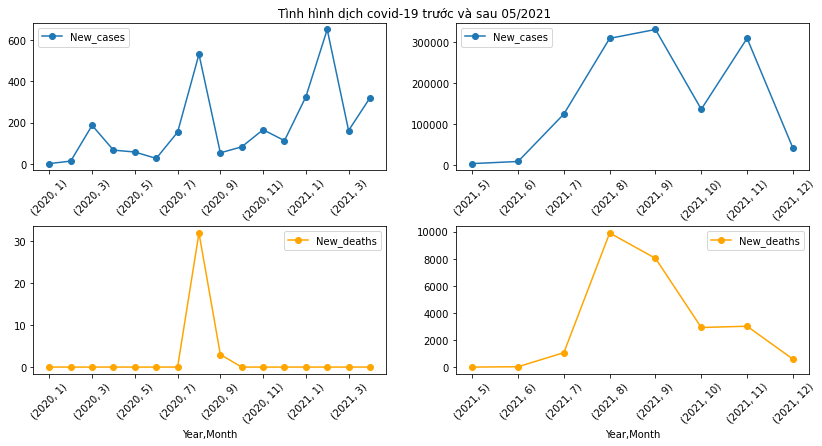

In [169]:
fig, axs = plt.subplots(2,2,figsize = (12,6))
before_df[['New_cases']].plot.line(marker = 'o',ax = axs[0,0])

after_df[['New_cases']].plot.line(marker = 'o',ax = axs[0,1])

before_df[['New_deaths']].plot.line(marker = 'o',
                                    ax = axs[1,0],color = 'orange')

after_df[['New_deaths']].plot.line(marker = 'o',
                                    ax = axs[1,1],color = 'orange')


fig.tight_layout(pad=2.5)  # kho·∫£ng c√°ch gi·ªØa c√°c figure
axs[0,0].tick_params(labelrotation=45, axis='x')
axs[0,1].tick_params(labelrotation=45, axis='x')
axs[1,0].tick_params(labelrotation=45, axis='x')
axs[1,1].tick_params(labelrotation=45, axis='x')
plt.suptitle('T√¨nh h√¨nh d·ªãch covid-19 tr∆∞·ªõc v√† sau 05/2021');

# Shift + O : show full figures in cell output

### Ch√∫ng ta s·∫Ω quan s√°t ƒë·ªânh d·ªãch c·ªßa Vi·ªát Nam s·∫Ω r∆°i v√†o th√°ng n√†o ? 

Nh·∫≠n x√©t:
- D·ªØ li·ªáu ch·ªâ thu th·∫≠p ƒë·∫øn h·∫øt ng√†y 03/12/2021 n√™n d·ªØ li·ªáu 12/2021 ·ªü ƒë√¢y kh√¥ng c√≥ ·ªπ nghƒ©a so s√°nh nh∆∞ng ta th·∫•y s·ªë ca nhi·ªÖm v√† t·ª≠ vong v·∫´n cao h∆°n ƒë·∫ßu d·ªãch - 05/2021 v√† 06/2021.
- ƒê·ªânh d·ªãch ·ªü Vi·ªát Nam r∆°i v√†o c√°c 08/2021 , 09/2021 v·ªõi h∆°n `300.000` ca nhi·ªÖm m·ªói th√°ng, trung b√¨nh `10.000` ca nhi·ªÖm m·ªói ng√†y.
- S·ªë ca t·ª≠ vong tƒÉng nhanh trong th·ªùi gian ng·∫Øn - h∆°n `25.000` ca so v·ªõi `35` ca t·ª≠ vong tr∆∞·ªõc ƒë√≥ 

## C√¢u h·ªèi s·ªë 4: T√¨nh h√¨nh ti√™m ch·ªßng gi·ªØa c√°c qu·ªëc gia.

·ªû c√¢u h·ªèi n√†y em s·∫Ω ph√¢n t√≠ch c√°c thu·ªôc t√≠nh sau:
- T·ªâ l·ªá ng∆∞·ªùi ti√™m tr√™n 1 m≈©i vaccine `PERSONS_FULLY_VACCINATED_PER100`
- T·ªâ l·ªá ng∆∞·ªùi ti√™m tr√™n 2 m≈©i vaccine `PERSONS_VACCINATED_1PLUS_DOSE_PER100`

**C√°c b∆∞·ªõc ph√¢n t√≠ch c√¢u h·ªèi:**
1. Ti·ªÅn x·ª≠ l√≠:
    - L·∫•y dataframe ch·ª©a 4 thu·ªôc t√≠nh `ISO3`, `PERSONS_FULLY_VACCINATED_PER100`, `PERSONS_VACCINATED_1PLUS_DOSE_PER100`
    - Ki·ªÉm tra c√°c ƒëi·ªÅu ki·ªán nh∆∞: c√°c c·ªôt rate th√¨ kh√¥ng ƒëu·ª£c qu√° 100 v√† b√© h∆°n 0.
    - Gi√° tr·ªã c·ªôt `FULL` s·∫Ω kh√¥ng th·ªÉ l·ªõn h∆°n gi√° tr·ªã `1PLUS`.
    - Kh√¥ng ch·ª©a gi√°  tr·ªã nan
    - N·∫øu d·ªØ li·ªáu n√†o vi ph·∫°m th√¨ s·∫Ω b·ªã lo·∫°i b·ªè.
2. Ph√¢n t√≠ch ph√¢n ph·ªëi d·ªØ li·ªáu
    - Th·ªëng k√™ c√°c th√¥ng s·ªë th·ªëng k√™ c∆° b·∫£n
    - Visualize bi·ªÉu ƒë·ªì `histogram` c·ªßa 2 d·ªØ li·ªáu tr√™n
3. Ph√¢n t√≠ch t·ªïng quan t√¨nh h√¨nh ti√™m ch·ªßng gi·ªØa c√°c qu·ªëc gia
    - L·∫•y d·ªØ li·ªáu location c·ªßa c√°c n∆∞·ªõc tr√™n th·∫ø gi·ªõi. D·ªØ li·ªáu ƒë∆∞·ª£c cung c·∫•p b·ªüi [folium](https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json).
    - V·∫Ω `Choropleth map` cho d·ªØ li·ªáu `PERSONS_FULLY_VACCINATED_PER100`. L√Ω do ch·ªâ ch·ªçn 1 thu·ªôc t√≠nh b·ªüi c·∫£ 2 d·ªØ li·ªáu tr√™n kh√° t∆∞∆°ng ƒë·ªìng v·ªõi nhau, ch·ªâ c·∫ßn 1 thu·ªôc t√≠nh c≈©ng s·∫Ω nh√¨n ƒë∆∞·ª£c s·ª± t∆∞∆°ng quan gi·ªØa c√°c n∆∞·ªõc.
4. Nh·∫≠n x√©t k·∫øt qu·∫£

### Ti·ªÅn x·ª≠ l√≠ d·ªØ li·ªáu

In [170]:
# T·∫°o Dataframe
vaccin_region_df = vaccin_df[['ISO3' , 'PERSONS_FULLY_VACCINATED_PER100',\
                             'PERSONS_VACCINATED_1PLUS_DOSE_PER100']]

In [171]:
# T√¨m ki·∫øm outlier
outlier = vaccin_region_df[(vaccin_region_df['PERSONS_VACCINATED_1PLUS_DOSE_PER100'] > 100) |
                 (vaccin_region_df['PERSONS_FULLY_VACCINATED_PER100'] > 100) |
                 (vaccin_region_df['PERSONS_FULLY_VACCINATED_PER100'] > \
                vaccin_region_df['PERSONS_VACCINATED_1PLUS_DOSE_PER100'])]
outlier

ISO3  PERSONS_FULLY_VACCINATED_PER100  \
79   GIB                          118.201   
191  SOM                            4.445   
217  TZA                            1.647   

     PERSONS_VACCINATED_1PLUS_DOSE_PER100  
79                                121.679  
191                                 4.270  
217                                 0.591

In [172]:
# Lo·∫°i b·ªè outlier
vaccin_region_df = vaccin_region_df.drop(index=outlier.index)

In [173]:
# Ki·ªÉm tra l·∫°i
assert len(vaccin_region_df[(vaccin_region_df['PERSONS_VACCINATED_1PLUS_DOSE_PER100'] > 100) |
                 (vaccin_region_df['PERSONS_FULLY_VACCINATED_PER100'] > 100) |
                 (vaccin_region_df['PERSONS_FULLY_VACCINATED_PER100'] > \
                vaccin_region_df['PERSONS_VACCINATED_1PLUS_DOSE_PER100'])]) == 0

### Ph√¢n t√≠ch ph√¢n ph·ªëi d·ªØ li·ªáu

#### **Th·ªëng k√™ c∆° b·∫£n**

In [174]:
# Th·ªëng k√™ c∆° b·∫£n
vaccin_region_df.describe()

PERSONS_FULLY_VACCINATED_PER100  PERSONS_VACCINATED_1PLUS_DOSE_PER100
count                       218.000000                            218.000000
mean                         42.600252                             49.165362
std                          25.908668                             26.669541
min                           0.007000                              0.007000
25%                          21.501500                             27.023000
50%                          44.557500                             53.484500
75%                          65.513250                             71.774000
max                          86.580000                             98.994000

2 t·ªâ l·ªá tr√™n kh√° t∆∞∆°ng t·ª± nhau c·∫£ v·ªÅ gi√° tr·ªã v√† ƒë·ªô ch√™nh l·ªách gi·ªØa c√°c th√¥ng s·ªë.

#### **Visualize bi·ªÉu ƒë·ªì histogram**

In [175]:
# L·∫•y d·ªØ li·ªáu
full_rate = vaccin_region_df['PERSONS_FULLY_VACCINATED_PER100']
oneplus_rate = vaccin_region_df['PERSONS_VACCINATED_1PLUS_DOSE_PER100']

In [176]:
# L·∫•y min, max chung c·ªßa 2 series
bins = 20
rate_max = max(full_rate.max(), oneplus_rate.max())
rate_min = min(full_rate.min(), oneplus_rate.min())

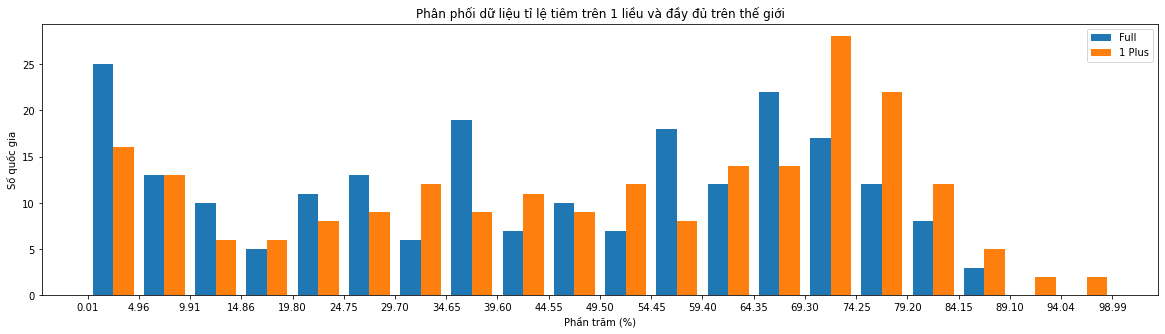

In [197]:
# Visualize 
plt.figure(figsize=(20,5))
plt.hist([full_rate, oneplus_rate], bins=bins, label=['Full', '1 Plus'])
plt.xticks(np.linspace(rate_min, rate_max, bins + 1))
plt.ylabel("S·ªë qu·ªëc gia")
plt.xlabel("Ph·∫ßn trƒÉm (%)")
plt.title("Ph√¢n ph·ªëi d·ªØ li·ªáu t·ªâ l·ªá ti√™m tr√™n 1 li·ªÅu v√† ƒë·∫ßy ƒë·ªß tr√™n th·∫ø gi·ªõi")
plt.legend();

2 D·ªØ li·ªáu c√≥ ƒë·ªô ph√¢n ph·ªëi ƒë·ªìng ƒë·ªÅu v·ªõi nhau, c√πng tƒÉng v√† c√πng gi·∫£m.

---

#### **T·ªïng quan t√¨nh h√¨nh ti√™m ch·ªßng gi·ªØa c√°c qu·ªëc gia**

In [178]:
# L·∫•y d·ªØ li·ªáu lacation
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/world-countries.json"

In [179]:
# V·∫Ω Chropleth Map
m = folium.Map()

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=vaccin_region_df,
    columns=["ISO3", "PERSONS_FULLY_VACCINATED_PER100"],
    key_on="feature.id",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color='white',
    bins=9,
    legend_name="Person Full Vaccinated Rate",
).add_to(m)

folium.LayerControl().add_to(m)

m

### Nh·∫≠n x√©t k·∫øt qu·∫£

Qua ph√¢n t√≠ch tr√™n, em r√∫t ra c√°c nh·∫≠n x√©t sau:
- T√¨nh h√¨nh ti√™m ch·ªßng tr√™n th·∫ø gi·ªõi c√≥ v·∫ª kh·∫£ quan, s·ªë li·ªÅu vaccin trung b√¨nh chi·∫øm kho·∫£ng 50% d√¢n s·ªë.
- Tuy nhi√™n, ·ªü bi·ªÅu ƒë·ªì `Histogram` c≈©ng cho th·∫•y c√≥ th·ªÉ chia c√°c n∆∞·ªõc th√†nh 3 nh√≥m:
  1. T·ªâ l·ªá ti√™m ch·ªßng r·∫•t th·∫•p, ch·ªâ ƒë·∫°t m·ª©c 0 - 5 %
  2. T·ªâ l·ªá ti√™m ch·ªßng trung b√¨nh, ƒë·∫∑t m·ª©c 34 - 39%
  3. T·ªâ l·ªá ti√™m ch·ªßng r·∫•t cao, ƒë·∫°t m·ª©c 70 - 80%
- C√≥ nh·ªØng n∆∞·ªõc c√≥ t·ªâ l·ªá ti√™m tr√™n 1 m≈©i ƒë·∫°t t·∫≠n 95 - 98%
- Qua bi·ªÉu ƒë·ªì `Chorepleth map`, ta s·∫Ω nh√¨n ƒë∆∞·ª£c 3 nh√≥m n∆∞·ªõc m√† em ƒë√£ ph√¢n ·ªü √Ω th·ª© 2.
  1. C√°c n∆∞·ªõc thu·ªôc Ch√¢u Phi t·ªâ l·ªá ti√™m r·∫•t th·∫•p.
  2. C√°c n∆∞·ªõc c√≥ t·ªâ l·ªá ti√™m trung b√¨nh n·∫±m ·ªü ƒê√¥ng Nam √Å, Trung √Å, v√† v√πng Caribe.
  3. C√°c n∆∞·ªõc c√≥ t·ªâ l·ªá ti√™m cao n·∫±m ·ªü Ch√¢u √Çu, ƒê√¥ng √Å, B·∫Øc M·ªπ v√† m·ªôt s·ªë n∆∞·ªõc Nam M·ªπ

---

## C√¢u h·ªèi s·ªë 5: ƒê·ªô ph·ªï bi·∫øn c·ªßa top 5 lo·∫°i vaccine d·∫´n ƒë·∫ßu qua t·ª´ng th·ªùi ƒëi·ªÉm

C√°c b∆∞·ªõc ph√¢n t√≠ch d·ªØ li·ªáu
1. Ti·ªÅn x·ª≠ l√≠ d·ªØ li·ªáu
    -  L·∫•y c√°c gi√° tr·ªã `ISO3`, `VACCINE_NAME`, `START_DATE` t·ª´ Dataframe `metavaccin_df`
    -  Lo·∫°i b·ªè nan ·ªü c·ªôt `START_DATE`
    -  Tr√≠ch th√¥ng tin NƒÉm - Th√°ng c·ªßa c·ªôt `START_DATE`
2. Ph√¢n t√≠ch d·ªØ li·ªáu
    -  Gom nh√≥m d·ªØ li·ªáu, m·ªói d√≤ng l√† 1 th√°ng, m·ªói c·ªôt l√† 1 lo·∫°i vaccine. √ù nghƒ©a l√† s·ªë qu·ªëc gia **m·ªõi** s·ª≠ d·ª•ng lo·∫°i vaccine ƒë√≥.
    -  Thay gi√° tr·ªã NaN b·∫±ng 0.
    -  T√≠nh t√≠ch l≈©y t·ªïng s·ªë qu·ªëc gia ƒë√£ s·ª≠ d·ª•ng vaccine ƒë√≥.
3. Visualize b·∫±ng `bar_chart_race`
4. Nh·∫≠n x√©t

### Ti·ªÅn x·ª≠ l√≠ d·ªØ li·ªáu

In [180]:
# B∆∞·ªõc 1 & 2. 
type_vaccine =  metavaccin_df.dropna(subset=['START_DATE'])[['ISO3', 'VACCINE_NAME', 'START_DATE']]

In [181]:
# Tr√≠ch th√¥ng tin NƒÉm - Th√°ng
type_vaccine['MONTH'] =  type_vaccine['START_DATE'].dt.strftime("%Y-%m")
type_vaccine.head()

ISO3              VACCINE_NAME START_DATE    MONTH
23  CHN    Anhui ZL - Recombinant 2021-03-17  2021-03
24  UZB    Anhui ZL - Recombinant 2021-04-28  2021-04
25  CHN    Shenzhen - LV-SMENP-DC 2021-06-01  2021-06
29  CHN         IMB - Inactivated 2021-06-09  2021-06
30  TKM  Gamaleya - Gam-Covid-Vac 2021-02-24  2021-02

### Ph√¢n t√≠ch d·ªØ li·ªáu

In [182]:
# Gom nh√≥m d·ªØ li·ªáu
new_country_month =  type_vaccine.groupby(['MONTH', 'VACCINE_NAME']).size().unstack(1)

In [183]:
# Thay gi√° tr·ªã NaN b·∫±ng 0.
new_country_month = new_country_month.fillna(0)

In [184]:
# T√≠nh t·ªïng t√≠ch l≈©y
new_country_month =  new_country_month.cumsum()
new_country_month

VACCINE_NAME  Anhui ZL - Recombinant  AstraZeneca - Vaxzevria  \
MONTH                                                           
2020-07                          0.0                      0.0   
2020-11                          0.0                      0.0   
2020-12                          0.0                      8.0   
2021-01                          0.0                     16.0   
2021-02                          0.0                     51.0   
2021-03                          1.0                     74.0   
2021-04                          2.0                     90.0   
2021-05                          2.0                     95.0   
2021-06                          2.0                     97.0   
2021-07                          2.0                    100.0   
2021-08                          2.0                    104.0   
2021-09                          2.0                    104.0   
2021-10                          2.0                    105.0   
2021-11                          2.0                    105.0   

VACCINE_NAME  Beijing CNBG - BBIBP-CorV  Bharat - Covaxin  CIGB - CIGB-66  \
MONTH                                                                       
2020-07                             1.0               0.0             0.0   
2020-11                             3.0               0.0             0.0   
2020-12                             3.0               0.0             0.0   
2021-01                             5.0               1.0             0.0   
2021-02                            11.0               2.0             0.0   
2021-03                            30.0               4.0             0.0   
2021-04                            37.0               6.0             0.0   
2021-05                            43.0               6.0             0.0   
2021-06                            49.0               6.0             0.0   
2021-07                            51.0               6.0             0.0   
2021-08                            54.0               6.0             0.0   
2021-09                            55.0               6.0             0.0   
2021-10                            56.0               6.0             1.0   
2021-11                            56.0               6.0             1.0   

VACCINE_NAME  CanSino - Convidecia  Gamaleya - Gam-Covid-Vac  \
MONTH                                                          
2020-07                        1.0                       0.0   
2020-11                        1.0                       0.0   
2020-12                        1.0                       1.0   
2021-01                        1.0                       4.0   
2021-02                        1.0                      14.0   
2021-03                        2.0                      22.0   
2021-04                        2.0                      26.0   
2021-05                        2.0                      32.0   
2021-06                        2.0                      34.0   
2021-07                        2.0                      34.0   
2021-08                        4.0                      36.0   
2021-09                        5.0                      36.0   
2021-10                        5.0                      36.0   
2021-11                        5.0                      36.0   

VACCINE_NAME  IMB - Inactivated  Janssen - Ad26.COV 2-S  Julphar - Hayat-Vax  \
MONTH                                                                          
2020-07                     0.0                     0.0                  0.0   
2020-11                     0.0                     0.0                  0.0   
2020-12                     0.0                     4.0                  0.0   
2021-01                     0.0                     5.0                  0.0   
2021-02                     0.0                     8.0                  0.0   
2021-03                     0.0                    15.0                  0.0   
2021-04                     0.0                    27.0      

In [185]:
# Ch·ªânh s·ª≠a t√™n column c·ªßa Dataframe
new_country_month.columns = ['Anhui ZL - Recombinant',
 'AstraZeneca - Vaxzevria',
 'Beijing CNBG - BBIBP-CorV',
 'Bharat - Covaxin',
 'CIGB - CIGB-66',
 'CanSino - Convidecia',
 'Gamaleya - Gam-Covid-Vac',
 'IMB - Inactivated',
 'Janssen - Ad26.COV 2-S',
 'Julphar - Hayat-Vax',
 'Moderna - Spikevax',
 'Pfizer BioNTech - Comirnaty',
 'RIBSP - QazVac',
 'SII - Covishield',
 'SRCVB - EpiVacCorona',
 'Shenzhen - LV-SMENP-DC',
 'Sinovac - CoronaVac',
 'Wuhan CNBG - Inactivated']

### Visualize

In [200]:
bcr.bar_chart_race(df=new_country_month,
                   filename="bar_chart_race.mp4",
                   n_bars=10,
                   steps_per_period=50, 
                   period_length=2000, 
                   dpi=120,
                   title="ƒê·ªô ph·ªï bi·∫øn c·ªßa c√°c lo·∫°i vaccine qua t·ª´ng th√°ng")

/home/lav/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/home/lav/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


### Nh·∫≠n x√©t

1. Vaccine b·∫Øt ƒë·∫ßu ƒë∆∞·ª£c s·ª≠ d·ª•ng ch√≠nh th·ª©c v√†o th√°ng 7 nƒÉm 2020
2. M√πa ƒë√¥ng nƒÉm 2020 v√† m√πa xu√¢n nƒÉm 2021 l√† th·ªùi gian m√† vaccine ƒë∆∞·ª£c ph·ªï bi·∫øn v·ªõi t·ªëc ƒë·ªô nhanh ch·ªëng.
3. V·ªõi l·ª£i th·∫ø ƒë∆∞·ª£c s·ª≠ d·ª•ng s·ªõm (c√≥ th·ªÉ ƒëi k√®m b·ªüi ch·∫•t l∆∞·ª£ng vaccine) m√† Fizer BioNTech ƒë√£ d·∫´n ƒë·∫ßu v·ªÅ s·ª± ph·ªï bi·∫øn vaccine ƒë√©n th√°n 2 - 2021.
4. D√π b·ªã AstraZeneca (c·ªßa Anh - Th·ª•y ƒêi·ªÉn) v∆∞·ª£t m·∫∑t trong v√†i th√°ng gi·ªØa nƒÉm 2021. Sau ƒë√≥ Fizer BioNTech l·∫°i chi·∫øm ng√¥i ƒë·∫ßu. Suy nghƒ© c√° nh√¢n c·ªßa em cho r·∫±ng ƒë√¢y l√† k·∫øt qu·∫£ c·ªßa ch∆∞∆°ng tr√¨nh vi·ªán tr·ª£ vaccine c·ªßa M·ªπ

# Nh√¨n l·∫°i qu√° tr√¨nh l√†m ƒë·ªì √°n

**Anh V≈©**
1. Kh√≥ khƒÉn:
    - Tr·∫£i qua 4 tu·∫ßn l√†m ƒë·ªì √°n v·ªõi em kh√≥ khƒÉn l·ªõn nh·∫•t l√† s·∫Øp x·∫øp th·ªùi gian l√†m ƒë·ªì √°n. Vi·ªác chia t·ª´ng giai ƒëo·∫°n ho√†nh th√†nh ƒë√£ ƒë∆∞·ª£c nh√≥m em b√†n b·∫°c kƒ©, d·ªÉ tr√°nh t√¨nh tr·∫°ng d·ªìn l·∫°i ·ªü th·ªùi gian cu·ªëi.
    - Ban ƒë·∫ßu khi s·ª≠ d·ª•ng git c√≤n nhi·ªÅu kh√≥ khƒÉn.
    - C√≤n l·∫°i th√¨ em kh√¥ng th·∫•y c√≥ kh√≥ khƒÉn g√¨, c√°c kƒ© nƒÉng c·∫ßn thi·∫øt ƒë√£ ƒë∆∞·ª£c th·∫ßy d·∫°y trong qu√° tr√¨nh h·ªçc n√™n ƒë√£ gi√∫p em r·∫•t nhi·ªÅu.
2. B√†i h·ªçc:
    - B√†i h·ªçc c·ªßa em c≈©ng r√∫t ra ƒë∆∞·ª£c t·ª´ kh√≥ khƒÉn. ƒê√≥ l√† chia giai ƒëo·∫°n th·ª±c hi·ªán cho m·ªôt m·ª•c ti√™u d√†i h·∫°n. 
    - N·ªó l·ª±c trong qu√° tr√¨nh th√¨ k·∫øt qu·∫£ s·∫Ω d·ªÖ d√†ng ho√†n th√†nh h∆°n.
    

**Ph√∫ Th·ª•**
1. Kh√≥ khƒÉn:
    - V√¨ l√† th·ªùi ƒëi·ªÉm cu·ªëi k·ª≥ n√™n v·ª´a b·∫≠n √¥n t·∫≠p v·ª´a b·∫≠n l√†m ƒë·ªì √°n v√† d·ªãch b·ªánh n√™n team kh√¥ng th·ªÉ g·∫∑p m·∫∑t trao ƒë·ªïi hay trao ƒë·ªïi v·ªõi nhau th∆∞·ªùng xuy√™n.
    - L·∫ßn ƒë·∫ßu d√πng git l√†m ƒë·ªì √°n n√™n c√≤n nhi·ªÅu b·ª° ng·ª°.
    - G·∫∑p kh√≥ khi v·ª´a b·∫Øt ƒë·∫ßu suy nghƒ© n√™n kh√°m ph√° t·ª´ ƒë√¢u, ƒë∆∞a ra c√¢u h·ªèi nh∆∞ n√†o.
2. B√†i h·ªçc:
    - N√™n l√™n th·ªùi gian bi·ªÉu t·ª´ s·ªõm ƒë·ªÉ tr√°nh t√¨nh tr·∫°ng qu√° t·∫£i c√¥ng vi·ªác.
    - N√™n chƒÉm xem tin t·ª©c, nghe th·ªùi s·ª± ƒë·ªÉ th·∫•y c√°ch ng∆∞·ªùi ta visualazation v√† th·ªëng k√™ s·ªë li·ªáu

**Nh√≥m** \
- N·∫øu c√≥ th√™m th·ªùi gian nh√≥m em s·∫Ω c·∫£i thi·ªán ch·∫•t l∆∞·ª£ng c√°c visualize h∆°n. V√¨ `choropleth map` v√† `bar chart race` ch∆∞a ƒë·∫πp cho l·∫Øm.
- H·ªçc th√™m c√°ch scale d·ªØ li·ªáu ƒë·ªÉ c√≥ th·ªÉ k·∫øt h·ª£p nhi·ªÅu lo·∫°i d·ªØ li·ªáu trong 1 l·∫ßn visualize

# T√†i li·ªáu tham kh·∫£o

1. [Ngu·ªìn d·ªØ li·ªáu COVID-19 v√† VACCINE](https://covid19.who.int/info/)
2. C√°c h∆∞·ªõng d·∫´n c·ªßa th·∫ßy Ki√™n trong c√°c HW1, HW2, HW3
3. [Folium (d√πng ƒë·ªÉ v·∫Ω b·∫£n ƒë·ªì)](https://python-visualization.github.io/folium/quickstart.html)
4. [V·∫Ω bar chart race](https://github.com/dexplo/bar_chart_race)
5. [Pandas](https://pandas.pydata.org/)
6. [Matplotlib](https://matplotlib.org/) d√πng ƒë·ªÉ v·∫Ω c√°c chart nh∆∞ pie, line, ...vv..